### TASK 1: Descriptive analysis

Step 1：Import Dataset

In [28]:
import pandas as pd

df = pd.read_csv('Dataset-PT.csv')
header = df.iloc[0].tolist()
df = df.iloc[1:].copy()
df.columns = header
#df = df.drop(['upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time' #real-time features
#]
#              , axis=1)

/var/folders/vb/kdzvvdd93_970mgjbcp_5hp80000gn/T/ipykernel_85395/2095265792.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset-PT.csv')


Step 2: Data Cleaning & Type Conversion

In [29]:
# First, let's inspect the current data types of all columns
print("Data types before conversion:")
df.info()

# Define the columns that should be numeric
numeric_cols = [
    'stop_sequence', 
    'arrival_delay',  # This is your target variable
    'dwell_time', 
    'travel_time_for_previous_section', 
    'scheduled_travel_time', 
    'origin_delay', 
    'traffic_condition', 
    'recurrent_delay'
]

# Use pd.to_numeric to convert these columns
# The 'errors='coerce'' argument will turn any value that cannot be converted into NaN (Not a Number)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any missing values that were created during conversion
print("\nMissing values count after conversion:")
print(df.isnull().sum())

# A simple strategy to handle missing values is to drop the rows that contain them
df.dropna(inplace=True)

# Verify the final state of the data to ensure types are correct and no missing values remain
print("\nData info after conversion and handling missing values:")
df.info()
print(f"\nData cleaning complete! Number of remaining rows: {len(df)}")

Data types before conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 1 to 545103
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Calendar_date                      545103 non-null  object
 1   route_id                           545103 non-null  object
 2   bus_id                             545103 non-null  object
 3   stop_sequence                      545103 non-null  object
 4   arrival_delay                      545103 non-null  object
 5   dwell_time                         545103 non-null  object
 6   travel_time_for_previous_section   545103 non-null  object
 7   scheduled_travel_time              545103 non-null  object
 8   upstream_stop_delay                545103 non-null  object
 9   origin_delay                       545103 non-null  object
 10  previous_bus_delay                 545103 non-null  object
 11  previous_trip_travel_t

Step 3: Descriptive Analysis(Time and space)

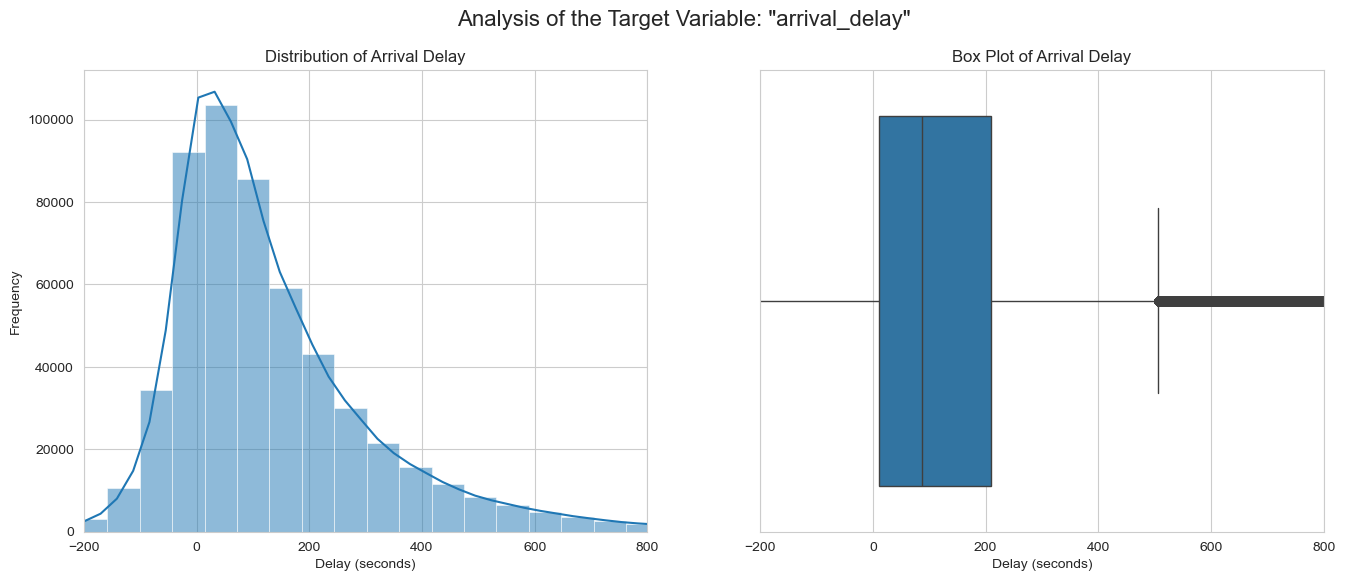


Descriptive Statistics for 'arrival_delay':
count    545103.000000
mean        134.972238
std         193.899487
min       -3493.000000
25%          11.000000
50%          88.000000
75%         209.000000
max        2257.000000
Name: arrival_delay, dtype: float64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a plotting style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Histogram to see the distribution of arrival delay
sns.histplot(df['arrival_delay'], bins=100, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Arrival Delay')
axes[0].set_xlabel('Delay (seconds)')
axes[0].set_ylabel('Frequency')
# Limit the x-axis to zoom in on the most common delay range
axes[0].set_xlim(-200, 800)

# Subplot 2: Box plot to identify the median, quartiles, and outliers
sns.boxplot(x=df['arrival_delay'], ax=axes[1])
axes[1].set_title('Box Plot of Arrival Delay')
axes[1].set_xlabel('Delay (seconds)')
axes[1].set_xlim(-200, 800)

plt.suptitle('Analysis of the Target Variable: "arrival_delay"', fontsize=16)
plt.show()

# Print key descriptive statistics for a precise summary
print("\nDescriptive Statistics for 'arrival_delay':")
print(df['arrival_delay'].describe())

--- Starting Spatial Analysis: Delay by Stop Sequence ---


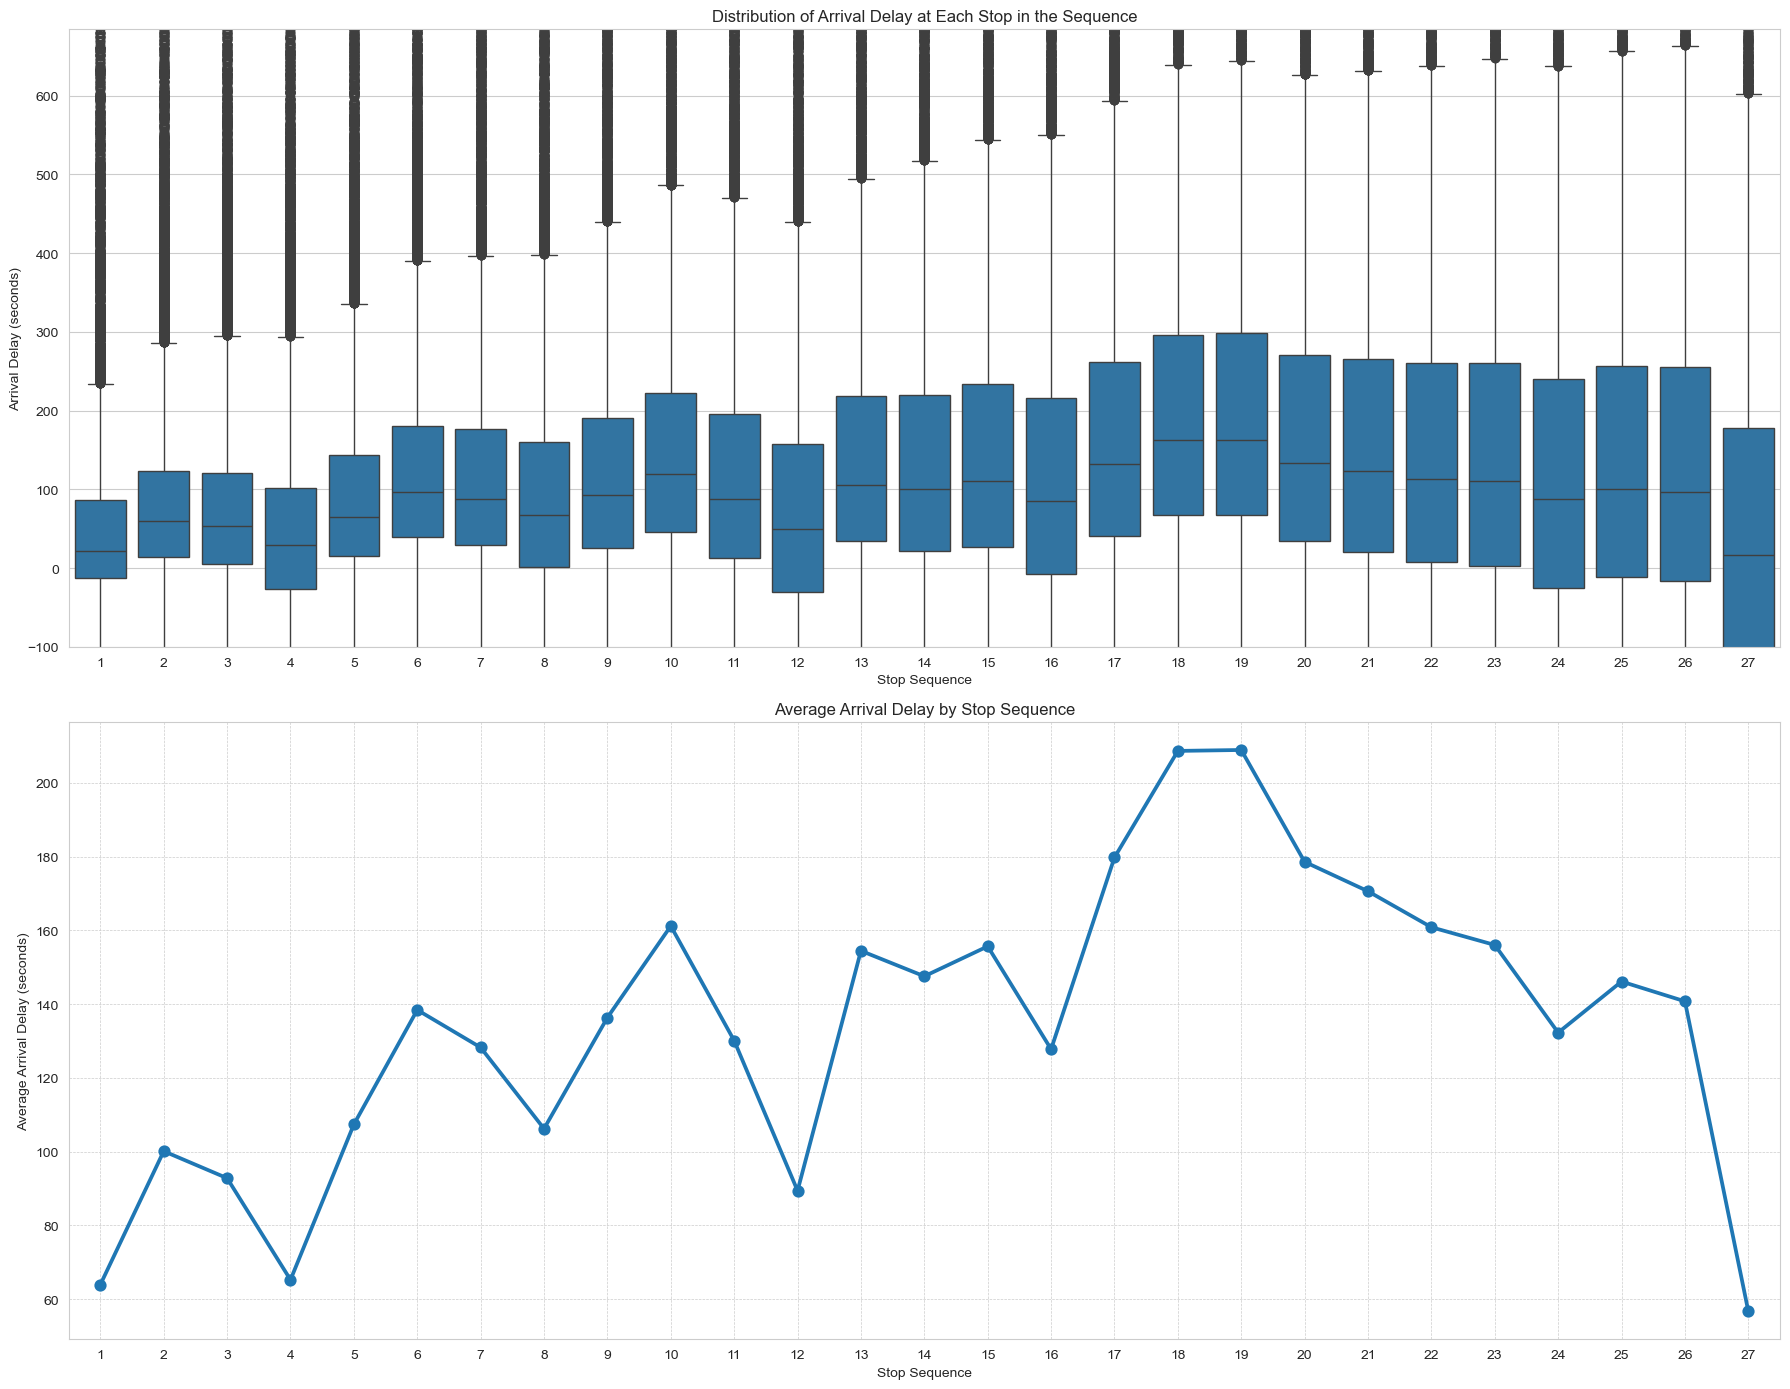

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataframe 'df' from the previous steps is available and cleaned.

print("--- Starting Spatial Analysis: Delay by Stop Sequence ---")

# Set the plotting style
sns.set_style("whitegrid")

# Create a figure with two subplots, one above the other
fig, axes = plt.subplots(2, 1, figsize=(18, 14))

# --- Subplot 1: Box Plot ---
# This shows the distribution of delay at each stop sequence
sns.boxplot(data=df, x='stop_sequence', y='arrival_delay', ax=axes[0])
axes[0].set_title('Distribution of Arrival Delay at Each Stop in the Sequence')
axes[0].set_xlabel('Stop Sequence')
axes[0].set_ylabel('Arrival Delay (seconds)')

# To make the plot more readable, we can limit the y-axis to the 98th percentile
# This zooms in on the main distribution, though extreme outliers will be outside this view
p98 = df['arrival_delay'].quantile(0.98)
axes[0].set_ylim(-100, p98)


# --- Subplot 2: Point Plot ---
# This clearly shows the trend of the average delay
sns.pointplot(data=df, x='stop_sequence', y='arrival_delay', ax=axes[1], errorbar=None)
axes[1].set_title('Average Arrival Delay by Stop Sequence')
axes[1].set_xlabel('Stop Sequence')
axes[1].set_ylabel('Average Arrival Delay (seconds)')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


# Improve overall layout and display the plots
plt.tight_layout()
plt.show()

/var/folders/vb/kdzvvdd93_970mgjbcp_5hp80000gn/T/ipykernel_85395/691416367.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset-PT.csv')


数据加载完成，开始进行数据类型转换...
数据清洗后，剩余 545103 行有效数据用于分析。


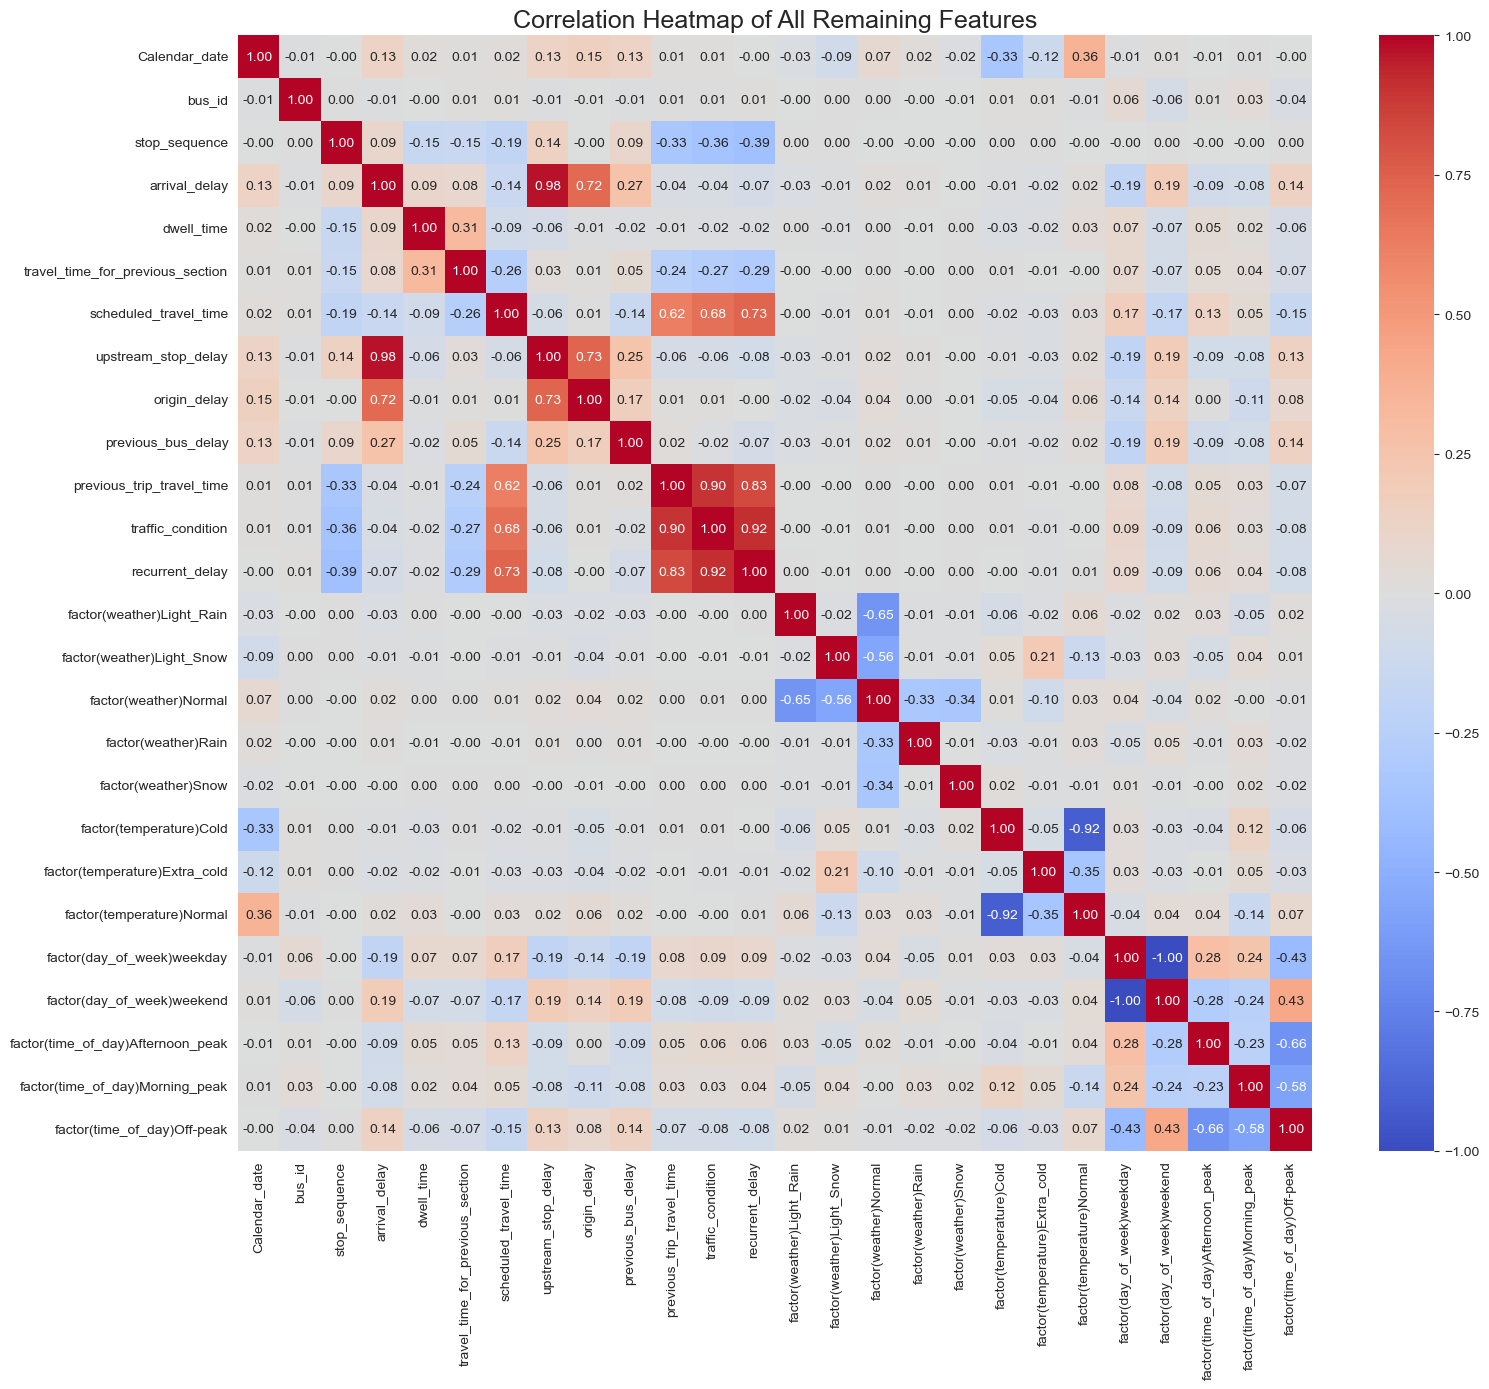

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 你的现有步骤 ---
df = pd.read_csv('Dataset-PT.csv')
header = df.iloc[0].tolist()
df = df.iloc[1:].copy()
df.columns = header
df = df.drop([
    'route_id','weather','temperature','day_of_week','time_of_day'
], axis=1)

print("数据加载完成，开始进行数据类型转换...")

# --- 关键步骤 1: 将所有列转换为数值类型 ---
# 我们对整个数据框尝试进行数值转换
# errors='coerce' 会将任何无法转换的文本（如空字符串）变成 NaN（缺失值）
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# --- 关键步骤 2: 处理因转换产生的缺失值 ---
# 为了准确计算相关性，最好删除包含缺失值的行
df_numeric.dropna(inplace=True)

print(f"数据清洗后，剩余 {len(df_numeric)} 行有效数据用于分析。")

# --- 步骤 3: 计算相关性矩阵 ---
# 现在所有数据都是干净的数值类型了，可以安全地计算相关性
corr_matrix = df_numeric.corr()

# --- 步骤 4: 绘制热力图 ---
# 设置一个合适的大小
plt.figure(figsize=(16, 14))

# 使用 seaborn 的 heatmap 函数来绘制图表
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# 添加标题
plt.title('Correlation Heatmap of All Remaining Features', fontsize=18)

# 自动调整布局，防止标签重叠
plt.tight_layout()

# 显示图表
plt.show()

数据加载完成，开始进行数据类型转换和清洗...
数据清洗后，剩余 545103 行有效数据用于分析。


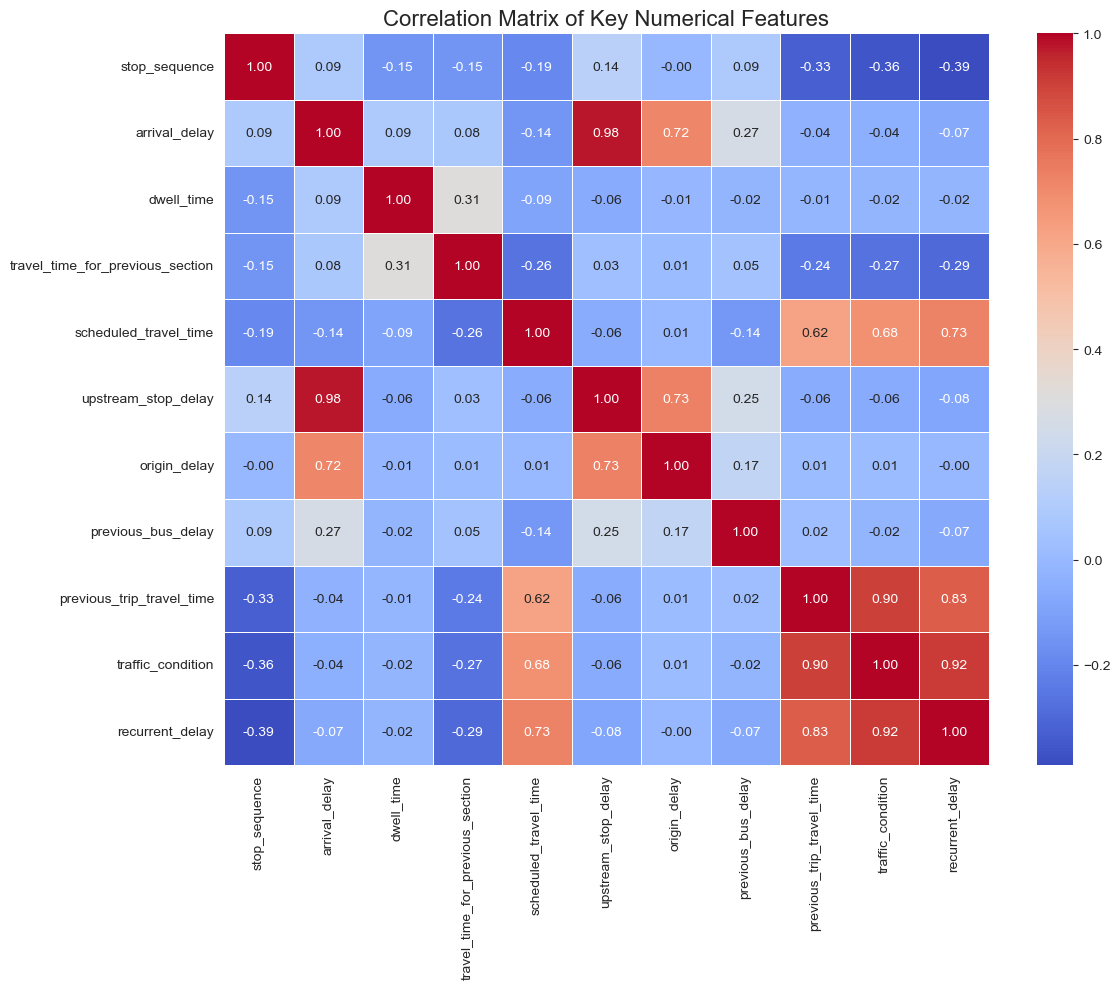

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 步骤 1: 加载并清洗您的真实数据集 ---
# (这部分逻辑来自您的第二个代码片段)
try:
    # 直接跳过第一个header行，更简洁
    df_full = pd.read_csv('Dataset-PT.csv', header=1)
except FileNotFoundError:
    print("错误: 'Dataset-PT.csv' 文件未找到，请确保文件已上传。")
    exit()

print("数据加载完成，开始进行数据类型转换和清洗...")

# --- 步骤 2: 将所有列转换为数值类型 ---
# 我们只选择那些本质上是连续数值的列来进行相关性分析
# 排除掉那些已经是哑变量(0/1)的分类特征，会让图表更清晰
columns_for_corr = [
    'stop_sequence', 'arrival_delay', 'dwell_time', 'travel_time_for_previous_section',
    'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
    'previous_trip_travel_time', 'traffic_condition', 'recurrent_delay'
]

# 创建一个新的DataFrame只包含这些列
df_numeric = df_full[columns_for_corr].copy()

# 对选定的列尝试进行数值转换
# errors='coerce' 会将任何无法转换的文本变成 NaN（缺失值）
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# 为了准确计算相关性，删除包含缺失值的行
df_numeric.dropna(inplace=True)

print(f"数据清洗后，剩余 {len(df_numeric)} 行有效数据用于分析。")


# --- 步骤 3: 计算相关性矩阵 ---
# 现在所有数据都是干净的数值类型了，可以安全地计算相关性
corr_matrix = df_numeric.corr()


# --- 步骤 4: 使用您喜欢的风格化代码进行绘图 ---
# (这部分绘图逻辑来自您的第一个代码片段)

# 1. 设置画布和坐标轴
fig, ax = plt.subplots(figsize=(12, 10))

# 2. 绘制带有更丰富样式的热力图
sns.heatmap(
    corr_matrix,
    annot=True,          # 在单元格中显示数值
    cmap='coolwarm',     # 使用 'coolwarm' (蓝-白-红) 色彩映射
    fmt='.2f',           # 将数值格式化为两位小数
    linewidths=.5,       # 在单元格之间添加细线
    ax=ax                # 指定在哪个坐标轴上绘图
)

# 3. 设置标题并自动调整布局
plt.title("Correlation Matrix of Key Numerical Features", fontsize=16)
plt.tight_layout() # 调整布局以防止标签重叠
plt.show()

In [34]:
corr_matrix = df.corr()

corr_matrix['arrival_delay'].sort_values(ascending=False)

arrival_delay                        1.000000
upstream_stop_delay                  0.975019
origin_delay                         0.716324
previous_bus_delay                   0.265434
factor(day_of_week)weekend           0.190783
factor(time_of_day)Off-peak          0.138109
Calendar_date                        0.129830
stop_sequence                        0.092616
dwell_time                           0.089433
travel_time_for_previous_section     0.081113
factor(weather)Normal                0.022642
factor(temperature)Normal            0.022444
factor(weather)Rain                  0.010833
factor(weather)Snow                 -0.001579
factor(weather)Light_Snow           -0.012642
bus_id                              -0.012769
factor(temperature)Cold             -0.013595
factor(temperature)Extra_cold       -0.024602
factor(weather)Light_Rain           -0.027323
previous_trip_travel_time           -0.036870
traffic_condition                   -0.043104
recurrent_delay                   

**TASK 2: Problem formulation**

1.Existing ITS

In [6]:
# 1. Directly create a random subset of 20% rows from the DataFrame
# The 'random_state' ensures you get the same "random" sample every time you run the code, which is good for reproducibility.
df_subset = df.sample(frac=0.2, random_state=42)

print('Number of observations in the subset:', df_subset.shape[0])


Number of observations in the subset: 109021


In [7]:
# 2. Define features (x) and target (y) from the new subset
# Make sure your df_subset has the one-hot encoded columns if you are dropping the originals.
try:
    # Features are the subset without the target and original categorical columns
    x = df_subset.drop(['arrival_delay', 'Calendar_date', 'weather', 'temperature', 'day_of_week', 'time_of_day', 
                        'upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time', 'travel_time_for_previous_section'], axis=1)
    
    # Target is just the 'arrival_delay' column
    y = df_subset['arrival_delay']
    
    print("\nFeatures (x) and target (y) created successfully.")
    print("Shape of x:", x.shape)
    print("Shape of y:", y.shape)

except KeyError as e:
    print(f"\nError: A column was not found in the subset. Please check the column names. Details: {e}")


Features (x) and target (y) created successfully.
Shape of x: (109021, 21)
Shape of y: (109021,)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Assume x, y, X_train, X_test, y_train, y_test are already defined ---

# 1. Create and Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Make Predictions and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


# 3. Analyze and Visualize Feature Importance (Place this code AFTER model.fit)
# Get the absolute values of the coefficients from the *trained* model
coefficients = np.abs(model.coef_)

# Create a pandas Series for better handling, with feature names as the index
# Ensure 'x' DataFrame is available here with the correct columns
feature_importance = pd.Series(coefficients, index=x.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Select the top 5
top_5_features = sorted_feature_importance.head(5)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette="viridis")
plt.title('Top 5 Most Important Features for Linear Regression', fontsize=16)
plt.xlabel('Absolute Coefficient Value (Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# Print the top 5 features
print("\nTop 5 Most Important Features:")
print(top_5_features)

NameError: name 'X_train' is not defined

Linear Regression

Cross Validation Score: 0.5632532325088583
Mean Absolute Error: 92.4896065097297
Mean Squared Error: 16324.087729349521
R-squared: 0.559388893520704


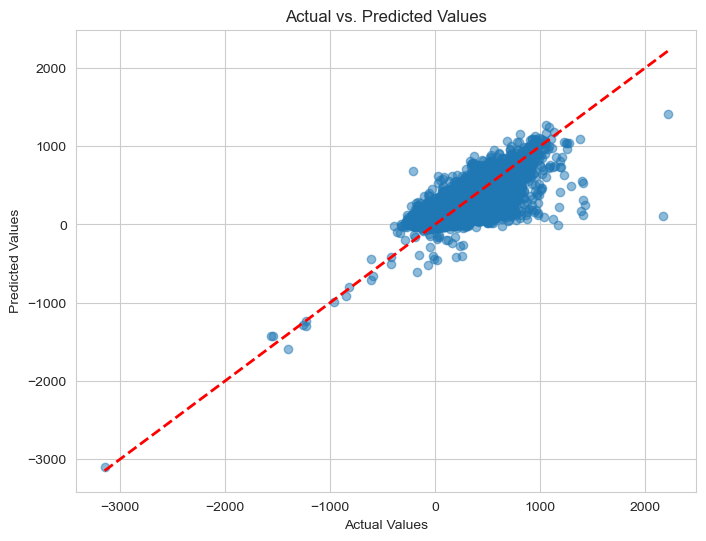

In [23]:
# Linear regression, for comparison
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

print('Cross Validation Score:', cross_val_score(model, x, y, cv=5, error_score='raise').mean())

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Mean Absolute Error: 92.4896065097297
R-squared: 0.559388893520704


/var/folders/vb/kdzvvdd93_970mgjbcp_5hp80000gn/T/ipykernel_85395/3421930860.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.values, y=top_5_features.index, palette="viridis")


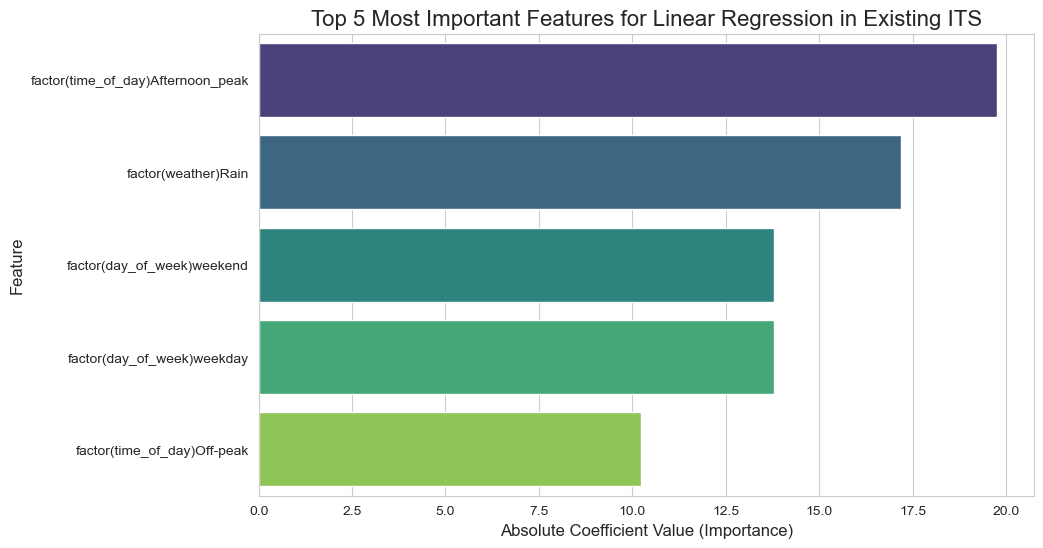


Top 5 Most Important Features:
factor(time_of_day)Afternoon_peak    19.753541
factor(weather)Rain                  17.203437
factor(day_of_week)weekend           13.804965
factor(day_of_week)weekday           13.804965
factor(time_of_day)Off-peak          10.242133
dtype: float64


In [24]:
# --- 假設 X_train, X_test, y_train, y_test 已經被定義和拆分 ---

# 1. 創建並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 2. 進行預測和評估
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


# 3. 分析並可視化特徵重要性 (在 model.fit 之後)
# 從 *已訓練* 的模型中獲取係數的絕對值
coefficients = np.abs(model.coef_)

# 創建一個 pandas Series 以便更好地處理
# 使用 X_train.columns 作為索引，以確保長度匹配！
feature_importance = pd.Series(coefficients, index=X_train.columns)

# 按重要性對特徵進行排序
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# 選取最重要的前5個特徵
top_5_features = sorted_feature_importance.head(5)

# --- 可視化 ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette="viridis")
plt.title('Top 5 Most Important Features for Linear Regression in Existing ITS', fontsize=16)
plt.xlabel('Absolute Coefficient Value (Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# 打印最重要的前5個特徵
print("\nTop 5 Most Important Features:")
print(top_5_features)

XGBoost

Data successfully split into training and testing sets.

--- Starting Hyperparameter Search for XGBoost ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5,

/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=1400, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=1400, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=1400, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=1400, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=1400, subsample=0.6; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1200, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=1200, subsa

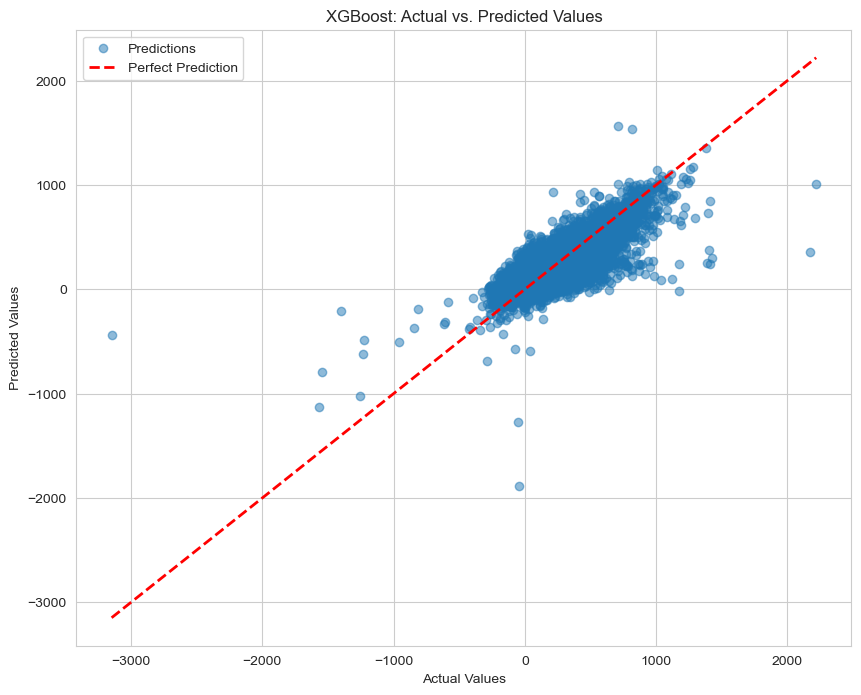

In [70]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
# Added imports for r2_score and matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import time
import matplotlib.pyplot as plt

# --- 1. Prepare Data ---
# Assume x and y are your fully prepared feature matrix and target vector
# x = ... 
# y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Data successfully split into training and testing sets.")


# --- 2. Define Hyperparameter Search Space ---
params = {
    'learning_rate':    [0.05, 0.1, 0.2, 0.3],
    'n_estimators':     [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_depth':        [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma':            [0.0, 0.1, 0.2, 0.3],
    'subsample':        [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# --- 3. Set up the Randomized Search ---
xgb = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=-1,
    random_state=42
)

folds = 5
skf = KFold(n_splits=folds, shuffle=True, random_state=1001)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting Hyperparameter Search for XGBoost ---")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print(f"RandomizedSearchCV took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate the Best Model Found ---
print("\n--- Evaluating the Best XGBoost Model ---")

# Get the best model
best_xgb_model = random_search.best_estimator_

print("Best Parameters found:")
print(random_search.best_params_)

# Make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate final performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

print("\n--- Final Performance on the Test Set ---")
print(f"Tuned XGBoost MAE (Mean Absolute Error): {mae_xgb:.2f} seconds")
print(f"Tuned XGBoost MSE (Mean Squared Error): {mse_xgb:.2f}")
print(f"Tuned XGBoost RMSE (Root Mean Squared Error): {rmse_xgb:.2f} seconds")
print(f"Tuned XGBoost R-squared: {r2_xgb:.4f}")


# --- 6. Visualize the Results (New Section) ---
print("\n--- Visualizing XGBoost Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

NN

Data successfully split and scaled manually.

--- Starting hyperparameter search... ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 4.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 4.5min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 4.6min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 4.7min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 4.8min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 4.8min
[CV] END batch_size=32, epochs=

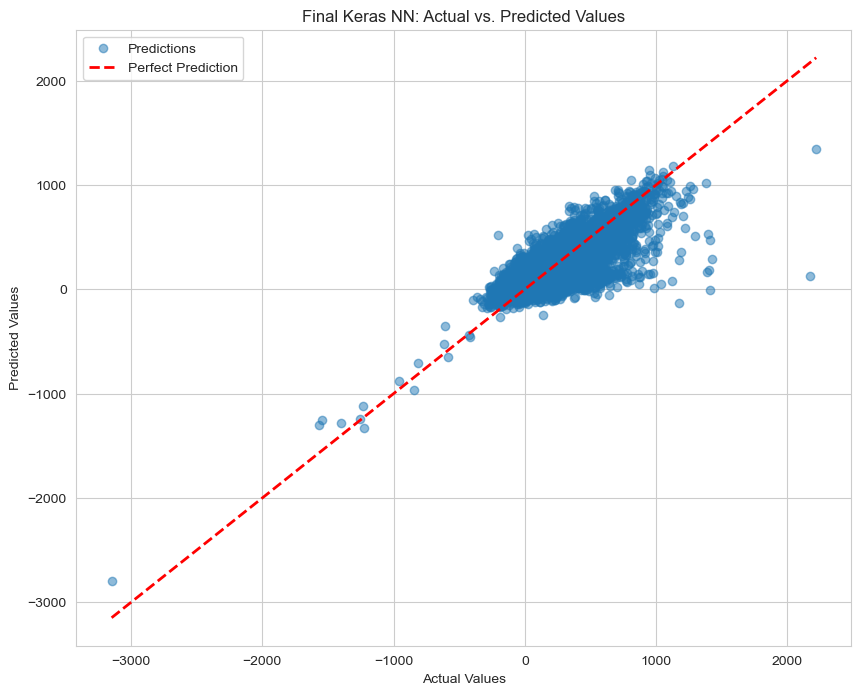

In [107]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# We are no longer using Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Keras and SciKeras imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# --- NEW: Manual Data Scaling ---
# We perform scaling manually before everything else.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled manually.")


# --- 2. Define a Function to Create the Keras Model ---
# The function now takes 'input_dim' as a standard argument again.
def construct_network_model(input_dim, layer_sizes, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    
    for size in layer_sizes:
        model.add(Dense(size, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    return model

# --- 3. Set up the KerasRegressor and Hyperparameter Grid ---

# Create the KerasRegressor wrapper.
# We explicitly pass the input dimension using the 'model__' prefix.
# This makes the model aware of the input shape from the start.
model = KerasRegressor(
    model=construct_network_model,
    verbose=0,
    model__input_dim=X_train_scaled.shape[1]  # Manually pass the input dimension
)

# Define the parameter grid
param_grid = {
    "model__layer_sizes": [[64, 32], [128, 64], [256, 128]],
    "model__dropout_rate": [0.2, 0.3],
    "model__learning_rate": [0.001, 0.01],
    "batch_size": [32, 64],  # NOTE: No 'model__' prefix needed here now
    "epochs": [150]
}

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)

# Instantiate GridSearchCV with the model, not a pipeline
grid = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting hyperparameter search... ---")
start_time = time.time()

# Fit the grid search on the SCALED training data
# We pass callbacks and validation_split directly to fit
grid.fit(
    X_train_scaled, 
    y_train, 
    callbacks=[early_stop], 
    validation_split=0.2
)

end_time = time.time()
print(f"\nSearch took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate and Save the Best Model ---
print("\n--- Evaluating the best model found by GridSearch ---")

print("Best parameters found: ", grid.best_params_)
best_cv_score = -grid.best_score_
print(f"Best cross-validation score (MAE): {best_cv_score:.2f} seconds")

best_model = grid.best_estimator_

# Save the weights of the best Keras model
best_model.model_.save("best_model_weights_final.keras")
print("\nBest model's weights saved to 'best_model_weights_final.keras'")

# Make predictions on the SCALED unseen test data
y_pred_best = best_model.predict(X_test_scaled)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# --- 6. Visualize the Results ---
print("\n--- Visualizing Keras Neural Network Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final Keras NN: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

RandomForest

--- Starting Randomized Search for RandomForestRegressor ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  19.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  20.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  40.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  41.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  43.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  45.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5

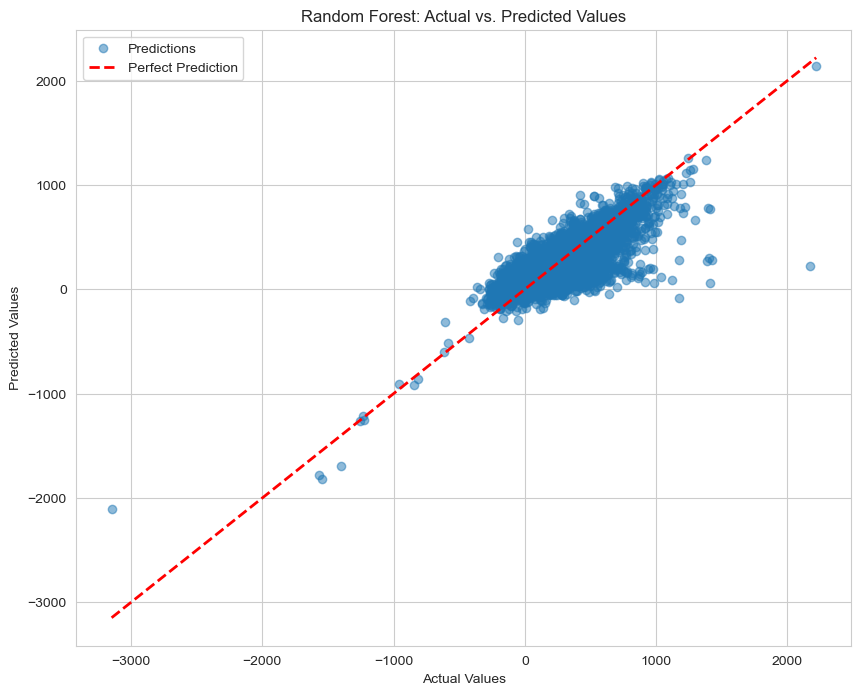

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # Import joblib for saving the model

# Assume X_train, X_test, y_train, y_test are already defined
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# --- 1. Define Parameter Space and Run Randomized Search ---

params = {
     'n_estimators': [100, 200, 300, 400],
     'max_depth': [10, 20, 30, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_distributions=params, 
    n_iter=20,
    cv=2,
    verbose=2, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

print("--- Starting Randomized Search for RandomForestRegressor ---")
random_search.fit(X_train, y_train)

# --- 2. Print Search Results ---

print("\n--- Search Complete ---")
best_params = random_search.best_params_
print("Best Parameters found:", best_params)

best_score = -random_search.best_score_
print(f"Best MAE score from search: {best_score:.2f}")


# --- 3. Evaluate and Save the Best Model (NEW SECTION) ---
print("\n--- Evaluating the best model found by RandomizedSearch ---")

# Get the best estimator (the trained model with the best parameters)
best_rf_model = random_search.best_estimator_

# Save the best model to a file using joblib
joblib.dump(best_rf_model, "best_random_forest_model.joblib")
print("\nBest Random Forest model saved to 'best_random_forest_model.joblib'")

# Make predictions on the unseen test data
# NOTE: We use X_test directly, NOT a scaled version, for tree-based models.
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")


# --- 4. Visualize the Results (NEW SECTION) ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

Does it work with limited features

In [121]:
# 2. Define features (x) and target (y) from the new subset
# Make sure your df_subset has the one-hot encoded columns if you are dropping the originals.
try:
    # Features are the subset without the target and original categorical columns
    x1 = df_subset.drop(['arrival_delay', 'Calendar_date', 'weather', 'temperature', 'day_of_week', 'time_of_day', 
                        'upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time', 'travel_time_for_previous_section','origin_delay'], axis=1)
    
    # Target is just the 'arrival_delay' column
    y1 = df_subset['arrival_delay']
    
    print("\nFeatures (x) and target (y) created successfully.")
    print("Shape of x:", x1.shape)
    print("Shape of y:", y1.shape)

except KeyError as e:
    print(f"\nError: A column was not found in the subset. Please check the column names. Details: {e}")


Features (x) and target (y) created successfully.
Shape of x: (109021, 20)
Shape of y: (109021,)


In [84]:
# --- Define Features and Target by Direct Selection (using x1, y1) ---

try:
    # 1. This is the specific list of columns you want to USE as features.
    feature_columns = [
        'origin_delay',             
        'scheduled_travel_time',    
        'recurrent_delay',          
        # Weather-related dummy variables
        'factor(weather)Light_Rain',
        'factor(weather)Light_Snow',
        'factor(weather)Normal',
        'factor(weather)Rain',
        'factor(weather)Snow',
        # Temperature-related dummy variables
        'factor(temperature)Cold',
        'factor(temperature)Extra_cold',
        'factor(temperature)Normal'
    ]

    # 2. Define the feature set (x1) by SELECTING these specific columns from the dataframe.
    x1 = df_subset[feature_columns]
    
    # 3. Define the target set (y1), which is still 'arrival_delay'.
    y1 = df_subset['arrival_delay']
    
    print("\nFeatures (x1) and target (y1) created successfully by direct selection.")
    print(f"Target (y1) is: 'arrival_delay'")
    print("Shape of x1:", x1.shape)
    print("Shape of y1:", y1.shape)

except KeyError as e:
    print(f"\nError: A column was not found. Please ensure that all column names in your feature list exist in the dataframe. Details: {e}")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")


Features (x1) and target (y1) created successfully by direct selection.
Target (y1) is: 'arrival_delay'
Shape of x1: (109021, 11)
Shape of y1: (109021,)


Linear Regression

Cross Validation Score: 0.07904957387980327
Mean Absolute Error: 131.4717528477726
Mean Squared Error: 34153.646717652104
R-squared: 0.07814290635601007


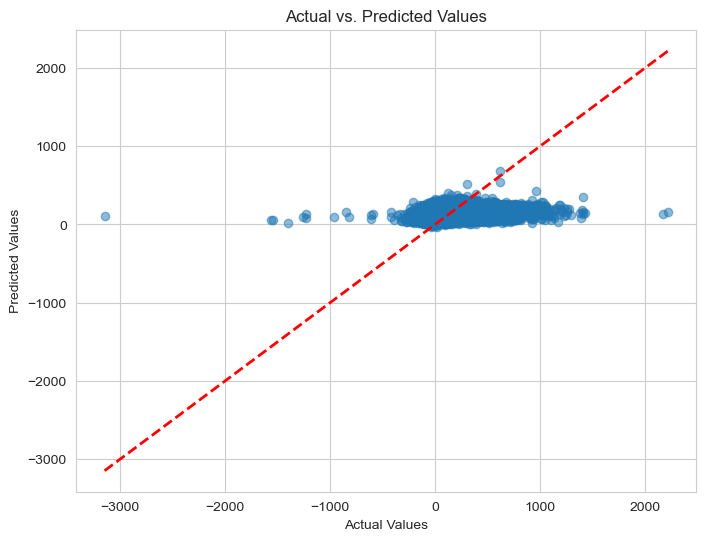

In [122]:
# Linear regression, for comparison
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

print('Cross Validation Score:', cross_val_score(model, x1, y1, cv=5, error_score='raise').mean())

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

XGBoost

Data successfully split into training and testing sets.

--- Starting Hyperparameter Search for XGBoost ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=3,

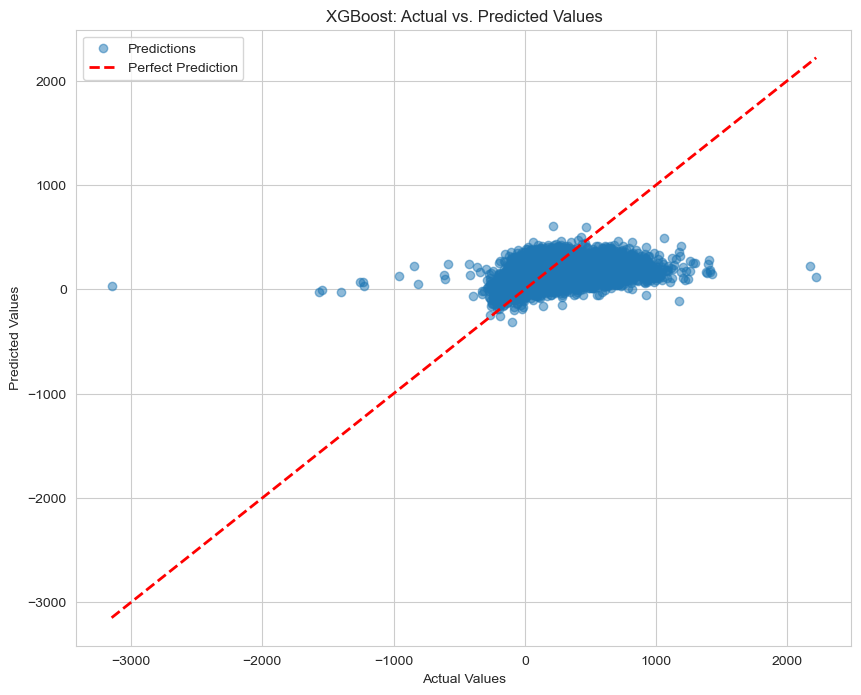

In [123]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
# Added imports for r2_score and matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import time
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
print("Data successfully split into training and testing sets.")


# --- 2. Define Hyperparameter Search Space ---
params = {
    'learning_rate':    [0.05, 0.1, 0.2, 0.3],
    'n_estimators':     [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_depth':        [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma':            [0.0, 0.1, 0.2, 0.3],
    'subsample':        [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# --- 3. Set up the Randomized Search ---
xgb = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=-1,
    random_state=42
)

folds = 5
skf = KFold(n_splits=folds, shuffle=True, random_state=1001)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting Hyperparameter Search for XGBoost ---")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print(f"RandomizedSearchCV took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate the Best Model Found ---
print("\n--- Evaluating the Best XGBoost Model ---")

# Get the best model
best_xgb_model = random_search.best_estimator_

print("Best Parameters found:")
print(random_search.best_params_)

# Make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate final performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

print("\n--- Final Performance on the Test Set ---")
print(f"Tuned XGBoost MAE (Mean Absolute Error): {mae_xgb:.2f} seconds")
print(f"Tuned XGBoost MSE (Mean Squared Error): {mse_xgb:.2f}")
print(f"Tuned XGBoost RMSE (Root Mean Squared Error): {rmse_xgb:.2f} seconds")
print(f"Tuned XGBoost R-squared: {r2_xgb:.4f}")


# --- 6. Visualize the Results (New Section) ---
print("\n--- Visualizing XGBoost Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

NN

Data successfully split and scaled manually.

--- Starting hyperparameter search... ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 3.7min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 3.9min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 4.0min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 4.0min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 4.0min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 4.1min
[CV] END batch_size=32, epochs=

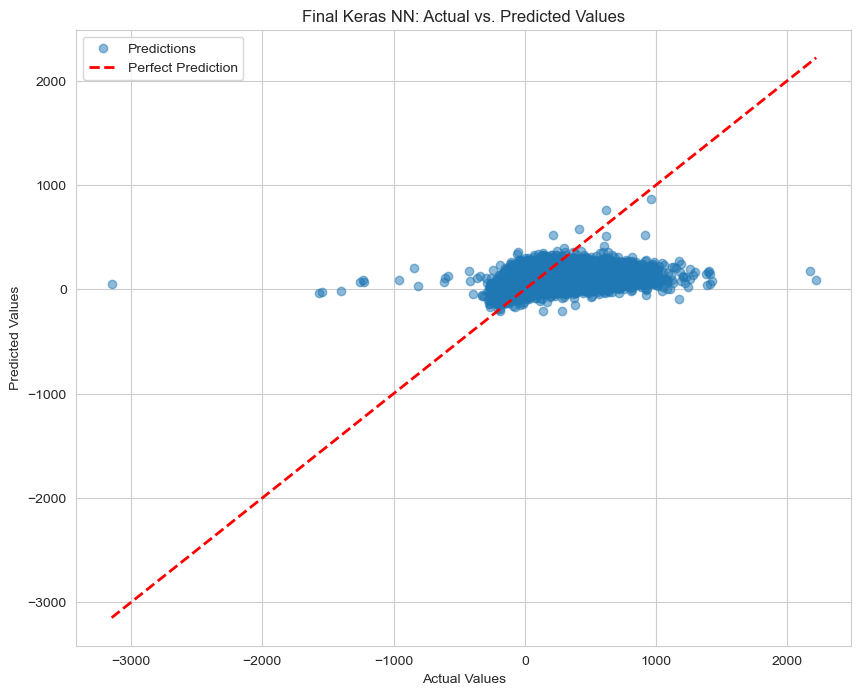

In [125]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# We are no longer using Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Keras and SciKeras imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# --- NEW: Manual Data Scaling ---
# We perform scaling manually before everything else.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled manually.")


# --- 2. Define a Function to Create the Keras Model ---
# The function now takes 'input_dim' as a standard argument again.
def construct_network_model(input_dim, layer_sizes, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    
    for size in layer_sizes:
        model.add(Dense(size, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    return model

# --- 3. Set up the KerasRegressor and Hyperparameter Grid ---

# Create the KerasRegressor wrapper.
# We explicitly pass the input dimension using the 'model__' prefix.
# This makes the model aware of the input shape from the start.
model = KerasRegressor(
    model=construct_network_model,
    verbose=0,
    model__input_dim=X_train_scaled.shape[1]  # Manually pass the input dimension
)

# Define the parameter grid
param_grid = {
    "model__layer_sizes": [[64, 32], [128, 64], [256, 128]],
    "model__dropout_rate": [0.2, 0.3],
    "model__learning_rate": [0.001, 0.01],
    "batch_size": [32, 64],  # NOTE: No 'model__' prefix needed here now
    "epochs": [150]
}

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)

# Instantiate GridSearchCV with the model, not a pipeline
grid = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting hyperparameter search... ---")
start_time = time.time()

# Fit the grid search on the SCALED training data
# We pass callbacks and validation_split directly to fit
grid.fit(
    X_train_scaled, 
    y_train, 
    callbacks=[early_stop], 
    validation_split=0.2
)

end_time = time.time()
print(f"\nSearch took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate and Save the Best Model ---
print("\n--- Evaluating the best model found by GridSearch ---")

print("Best parameters found: ", grid.best_params_)
best_cv_score = -grid.best_score_
print(f"Best cross-validation score (MAE): {best_cv_score:.2f} seconds")

best_model = grid.best_estimator_

# Save the weights of the best Keras model
best_model.model_.save("best_model_weights_final.keras")
print("\nBest model's weights saved to 'best_model_weights_final.keras'")

# Make predictions on the SCALED unseen test data
y_pred_best = best_model.predict(X_test_scaled)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# --- 6. Visualize the Results ---
print("\n--- Visualizing Keras Neural Network Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final Keras NN: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

Random Forest

--- Starting Randomized Search for RandomForestRegressor ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  16.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  16.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  33.6s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  34.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  36.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  36.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5

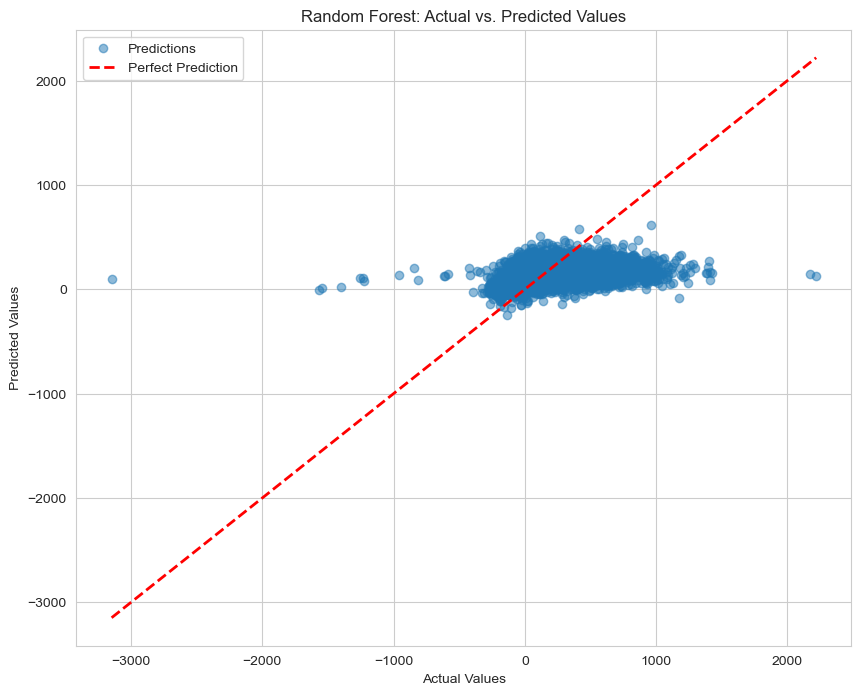

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # Import joblib for saving the model

# Assume X_train, X_test, y_train, y_test are already defined
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# --- 1. Define Parameter Space and Run Randomized Search ---

params = {
     'n_estimators': [100, 200, 300, 400],
     'max_depth': [10, 20, 30, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_distributions=params, 
    n_iter=20,
    cv=2,
    verbose=2, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

print("--- Starting Randomized Search for RandomForestRegressor ---")
random_search.fit(X_train, y_train)

# --- 2. Print Search Results ---

print("\n--- Search Complete ---")
best_params = random_search.best_params_
print("Best Parameters found:", best_params)

best_score = -random_search.best_score_
print(f"Best MAE score from search: {best_score:.2f}")


# --- 3. Evaluate and Save the Best Model (NEW SECTION) ---
print("\n--- Evaluating the best model found by RandomizedSearch ---")

# Get the best estimator (the trained model with the best parameters)
best_rf_model = random_search.best_estimator_

# Save the best model to a file using joblib
joblib.dump(best_rf_model, "best_random_forest_model.joblib")
print("\nBest Random Forest model saved to 'best_random_forest_model.joblib'")

# Make predictions on the unseen test data
# NOTE: We use X_test directly, NOT a scaled version, for tree-based models.
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")


# --- 4. Visualize the Results (NEW SECTION) ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

2.Advanced ITS

In [35]:
# 2. Define features (x) and target (y) from the new subset
# Make sure your df_subset has the one-hot encoded columns if you are dropping the originals.
try:
    # Features are the subset without the target and original categorical columns
    x2 = df_subset.drop(['arrival_delay', 'Calendar_date', 'weather', 'temperature', 'day_of_week', 'time_of_day', ], axis=1)
    
    # Target is just the 'arrival_delay' column
    y2 = df_subset['arrival_delay']
    
    print("\nFeatures (x) and target (y) created successfully.")
    print("Shape of x:", x2.shape)
    print("Shape of y:", y2.shape)

except KeyError as e:
    print(f"\nError: A column was not found in the subset. Please check the column names. Details: {e}")


Features (x) and target (y) created successfully.
Shape of x: (109021, 25)
Shape of y: (109021,)


Linear regression

Cross Validation Score: 0.989362496040074
Mean Absolute Error: 12.630639679158428
Mean Squared Error: 428.4447756813865
R-squared: 0.9884356461562724


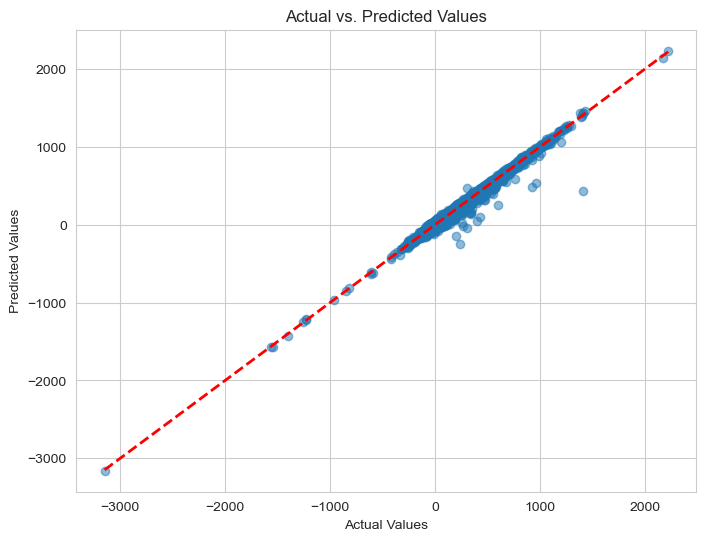

In [13]:
# Linear regression, for comparison
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

print('Cross Validation Score:', cross_val_score(model, x2, y2, cv=5, error_score='raise').mean())

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Mean Absolute Error: 12.630639679158428
R-squared: 0.9884356461562724


/var/folders/vb/kdzvvdd93_970mgjbcp_5hp80000gn/T/ipykernel_85395/1005548010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.values, y=top_5_features.index, palette="viridis")


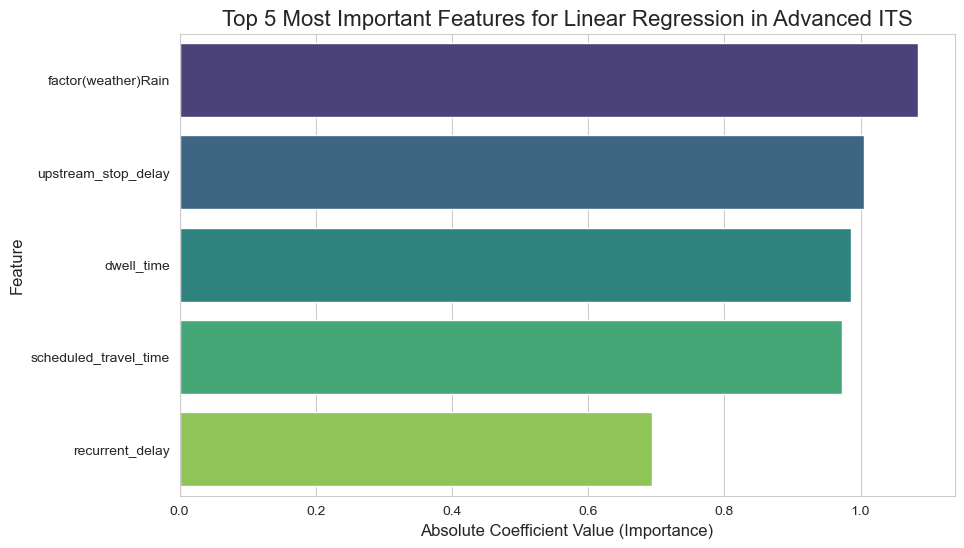


Top 5 Most Important Features :
factor(weather)Rain      1.083767
upstream_stop_delay      1.005464
dwell_time               0.986390
scheduled_travel_time    0.972674
recurrent_delay          0.694408
dtype: float64


In [21]:
# --- 假設 X_train, X_test, y_train, y_test 已經被定義和拆分 ---

# 1. 創建並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 2. 進行預測和評估
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


# 3. 分析並可視化特徵重要性 (在 model.fit 之後)
# 從 *已訓練* 的模型中獲取係數的絕對值
coefficients = np.abs(model.coef_)

# 創建一個 pandas Series 以便更好地處理
# 使用 X_train.columns 作為索引，以確保長度匹配！
feature_importance = pd.Series(coefficients, index=X_train.columns)

# 按重要性對特徵進行排序
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# 選取最重要的前5個特徵
top_5_features = sorted_feature_importance.head(5)

# --- 可視化 ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette="viridis")
plt.title('Top 5 Most Important Features for Linear Regression in Advanced ITS', fontsize=16)
plt.xlabel('Absolute Coefficient Value (Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# 打印最重要的前5個特徵
print("\nTop 5 Most Important Features :")
print(top_5_features)

XGBoost

In [38]:
# --- Place this cleaning code BEFORE train_test_split(x2, y2, ...) ---

print("--- Starting Data Cleaning for x2 ---")

# 1. Drop identifier columns
cols_to_drop = ['route_id', 'bus_id']
# Check if columns exist before trying to drop them to avoid errors
existing_cols_to_drop = [col for col in cols_to_drop if col in x2.columns]
x2 = x2.drop(columns=existing_cols_to_drop)
print(f"Dropped identifier columns: {existing_cols_to_drop}")

# 2. Convert potentially numeric columns from 'object' to a numeric type
# These are columns that should be numbers but were read as objects
cols_to_convert_numeric = ['upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time']
for col in cols_to_convert_numeric:
    if col in x2.columns:
        # 'coerce' will replace any text that can't be converted with NaN (a missing value)
        x2[col] = pd.to_numeric(x2[col], errors='coerce')

# Handle any missing values that might have been created by the 'coerce' step
# A simple strategy is to fill them with 0. You could also use the median.
x2.fillna(0, inplace=True)
print(f"Converted columns to numeric: {cols_to_convert_numeric}")

# 3. Convert all remaining 'object' columns (from one-hot encoding) to integers
# This will handle all the factor(...) columns at once
object_cols = x2.select_dtypes(include=['object']).columns
x2[object_cols] = x2[object_cols].astype(int)
print(f"Converted {len(object_cols)} one-hot encoded columns to integer type.")

# --- Verification Step ---
print("\n--- Data types of x2 AFTER cleaning ---")
x2.info()

# Now you can safely proceed with your train_test_split and model training
# X_train, X_test, y_train, y_test = train_test_split(x2, y2, ...)

--- Starting Data Cleaning for x2 ---
Dropped identifier columns: ['route_id', 'bus_id']
Converted columns to numeric: ['upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time']
Converted 13 one-hot encoded columns to integer type.

--- Data types of x2 AFTER cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 109021 entries, 50048 to 77923
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   stop_sequence                      109021 non-null  int64  
 1   dwell_time                         109021 non-null  int64  
 2   travel_time_for_previous_section   109021 non-null  int64  
 3   scheduled_travel_time              109021 non-null  int64  
 4   upstream_stop_delay                109021 non-null  int64  
 5   origin_delay                       109021 non-null  int64  
 6   previous_bus_delay                 109021 non-null  int64  
 7   previous_tri

Data successfully split into training and testing sets.

--- Starting Hyperparameter Search for XGBoost ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=3,

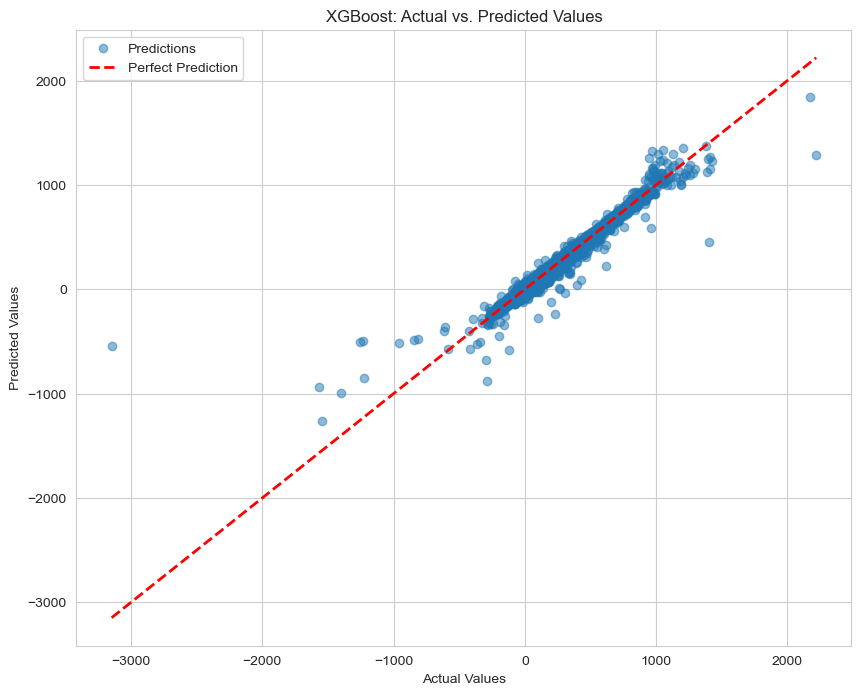

In [39]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
# Added imports for r2_score and matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import time
import matplotlib.pyplot as plt

# --- 1. Prepare Data ---
# Assume x and y are your fully prepared feature matrix and target vector
# x = ... 
# y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
print("Data successfully split into training and testing sets.")


# --- 2. Define Hyperparameter Search Space ---
params = {
    'learning_rate':    [0.05, 0.1, 0.2, 0.3],
    'n_estimators':     [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_depth':        [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma':            [0.0, 0.1, 0.2, 0.3],
    'subsample':        [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# --- 3. Set up the Randomized Search ---
xgb = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=-1,
    random_state=42
)

folds = 5
skf = KFold(n_splits=folds, shuffle=True, random_state=1001)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting Hyperparameter Search for XGBoost ---")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print(f"RandomizedSearchCV took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate the Best Model Found ---
print("\n--- Evaluating the Best XGBoost Model ---")

# Get the best model
best_xgb_model = random_search.best_estimator_

print("Best Parameters found:")
print(random_search.best_params_)

# Make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate final performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

print("\n--- Final Performance on the Test Set ---")
print(f"Tuned XGBoost MAE (Mean Absolute Error): {mae_xgb:.2f} seconds")
print(f"Tuned XGBoost MSE (Mean Squared Error): {mse_xgb:.2f}")
print(f"Tuned XGBoost RMSE (Root Mean Squared Error): {rmse_xgb:.2f} seconds")
print(f"Tuned XGBoost R-squared: {r2_xgb:.4f}")


# --- 6. Visualize the Results (New Section) ---
print("\n--- Visualizing XGBoost Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

Data successfully split and scaled manually.

--- Starting hyperparameter search... ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 4.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 4.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 4.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 4.5min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 4.7min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 4.7min
[CV] END batch_size=32, epochs=

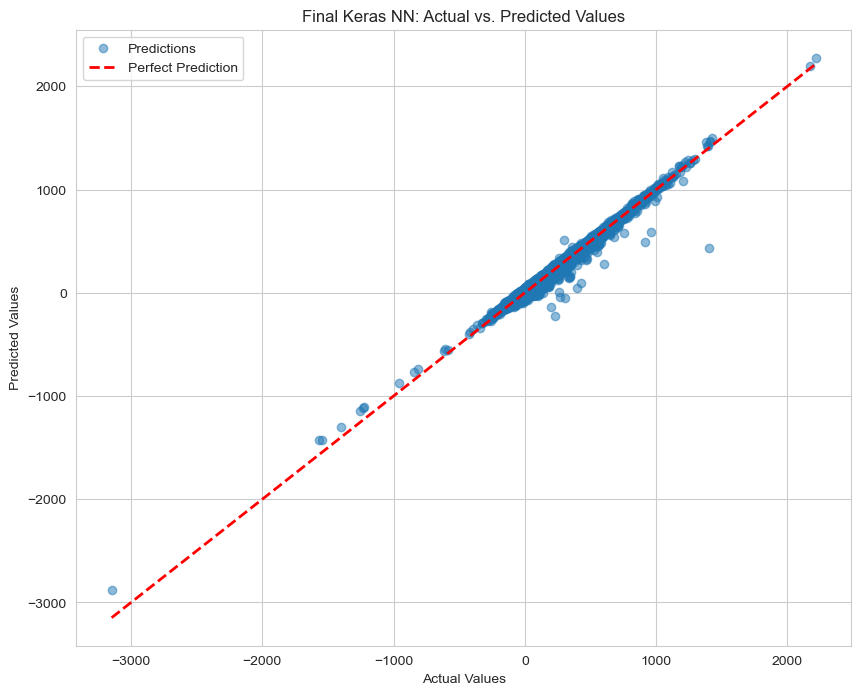

In [183]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# We are no longer using Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Keras and SciKeras imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# --- NEW: Manual Data Scaling ---
# We perform scaling manually before everything else.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled manually.")


# --- 2. Define a Function to Create the Keras Model ---
# The function now takes 'input_dim' as a standard argument again.
def construct_network_model(input_dim, layer_sizes, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    
    for size in layer_sizes:
        model.add(Dense(size, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    return model

# --- 3. Set up the KerasRegressor and Hyperparameter Grid ---

# Create the KerasRegressor wrapper.
# We explicitly pass the input dimension using the 'model__' prefix.
# This makes the model aware of the input shape from the start.
model = KerasRegressor(
    model=construct_network_model,
    verbose=0,
    model__input_dim=X_train_scaled.shape[1]  # Manually pass the input dimension
)

# Define the parameter grid
param_grid = {
    "model__layer_sizes": [[64, 32], [128, 64], [256, 128]],
    "model__dropout_rate": [0.2, 0.3],
    "model__learning_rate": [0.001, 0.01],
    "batch_size": [32, 64],  # NOTE: No 'model__' prefix needed here now
    "epochs": [150]
}

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)

# Instantiate GridSearchCV with the model, not a pipeline
grid = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting hyperparameter search... ---")
start_time = time.time()

# Fit the grid search on the SCALED training data
# We pass callbacks and validation_split directly to fit
grid.fit(
    X_train_scaled, 
    y_train, 
    callbacks=[early_stop], 
    validation_split=0.2
)

end_time = time.time()
print(f"\nSearch took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate and Save the Best Model ---
print("\n--- Evaluating the best model found by GridSearch ---")

print("Best parameters found: ", grid.best_params_)
best_cv_score = -grid.best_score_
print(f"Best cross-validation score (MAE): {best_cv_score:.2f} seconds")

best_model = grid.best_estimator_

# Save the weights of the best Keras model
best_model.model_.save("best_model_weights_final.keras")
print("\nBest model's weights saved to 'best_model_weights_final.keras'")

# Make predictions on the SCALED unseen test data
y_pred_best = best_model.predict(X_test_scaled)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# --- 6. Visualize the Results ---
print("\n--- Visualizing Keras Neural Network Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final Keras NN: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

--- Starting Randomized Search for RandomForestRegressor ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  28.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  29.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  19.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  19.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  57.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  57.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5

/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.3min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  32.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

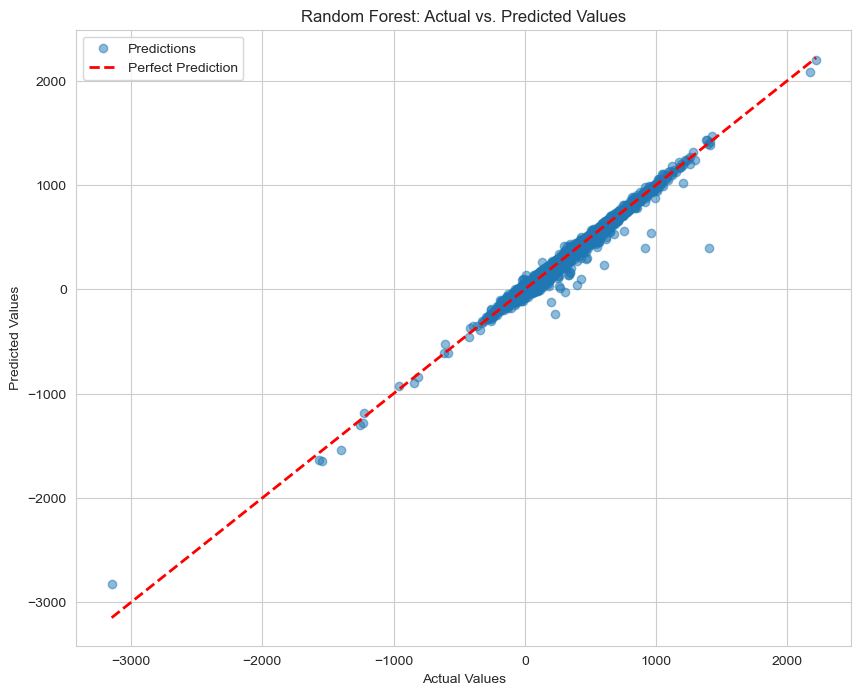

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # Import joblib for saving the model

# Assume X_train, X_test, y_train, y_test are already defined
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# --- 1. Define Parameter Space and Run Randomized Search ---

params = {
     'n_estimators': [100, 200, 300, 400],
     'max_depth': [10, 20, 30, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_distributions=params, 
    n_iter=20,
    cv=2,
    verbose=2, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

print("--- Starting Randomized Search for RandomForestRegressor ---")
random_search.fit(X_train, y_train)

# --- 2. Print Search Results ---

print("\n--- Search Complete ---")
best_params = random_search.best_params_
print("Best Parameters found:", best_params)

best_score = -random_search.best_score_
print(f"Best MAE score from search: {best_score:.2f}")


# --- 3. Evaluate and Save the Best Model (NEW SECTION) ---
print("\n--- Evaluating the best model found by RandomizedSearch ---")

# Get the best estimator (the trained model with the best parameters)
best_rf_model = random_search.best_estimator_

# Save the best model to a file using joblib
joblib.dump(best_rf_model, "best_random_forest_model.joblib")
print("\nBest Random Forest model saved to 'best_random_forest_model.joblib'")

# Make predictions on the unseen test data
# NOTE: We use X_test directly, NOT a scaled version, for tree-based models.
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")


# --- 4. Visualize the Results (NEW SECTION) ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
# 2. Define features (x) and target (y) from the new subset
# Make sure your df_subset has the one-hot encoded columns if you are dropping the originals.
try:
    # Features are the subset without the target and original categorical columns
    x3 = df_subset.drop(['arrival_delay', 'Calendar_date', 'weather', 'temperature', 'day_of_week', 'time_of_day', 
                        'origin_delay'], axis=1)
    
    # Target is just the 'arrival_delay' column
    y3 = df_subset['arrival_delay']
    
    print("\nFeatures (x) and target (y) created successfully.")
    print("Shape of x:", x3.shape)
    print("Shape of y:", y3.shape)

except KeyError as e:
    print(f"\nError: A column was not found in the subset. Please check the column names. Details: {e}")


Features (x) and target (y) created successfully.
Shape of x: (109021, 24)
Shape of y: (109021,)


Cross Validation Score: 0.9893601570161745
Mean Absolute Error: 12.636654506742053
Mean Squared Error: 428.54210594354447
R-squared: 0.9884330190695271


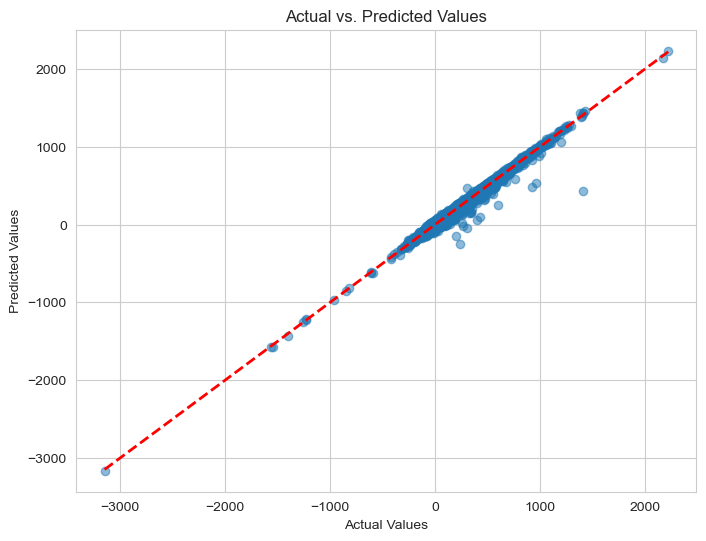

In [209]:
# Linear regression, for comparison
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

print('Cross Validation Score:', cross_val_score(model, x3, y3, cv=5, error_score='raise').mean())

X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Data successfully split into training and testing sets.

--- Starting Hyperparameter Search for XGBoost ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1400, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=3,

/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=1800, subsample=0.6; total time=  33.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   7.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=1000, subs

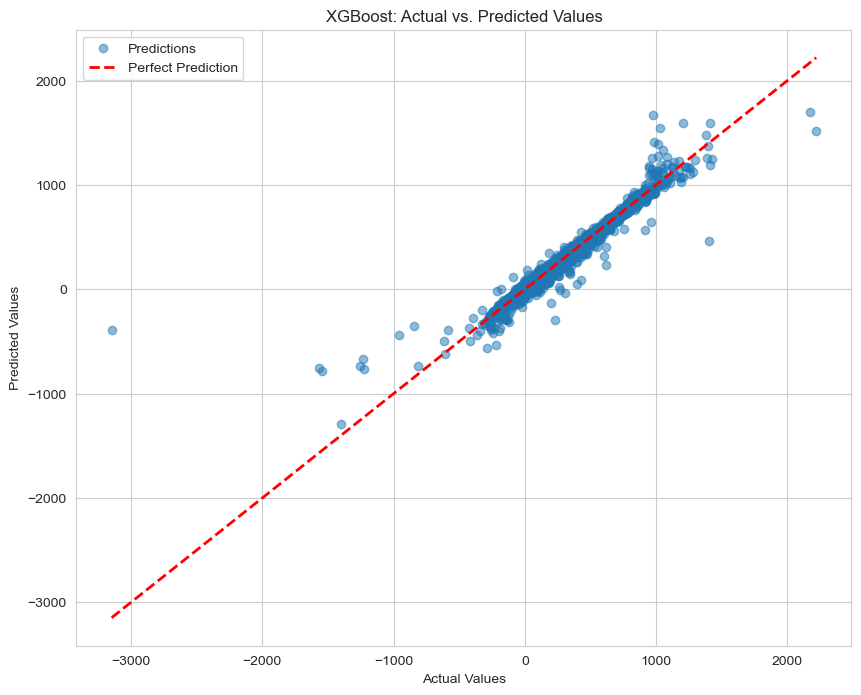

In [129]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
# Added imports for r2_score and matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import time
import matplotlib.pyplot as plt

# --- 1. Prepare Data ---
# Assume x and y are your fully prepared feature matrix and target vector
# x = ... 
# y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)
print("Data successfully split into training and testing sets.")


# --- 2. Define Hyperparameter Search Space ---
params = {
    'learning_rate':    [0.05, 0.1, 0.2, 0.3],
    'n_estimators':     [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_depth':        [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma':            [0.0, 0.1, 0.2, 0.3],
    'subsample':        [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# --- 3. Set up the Randomized Search ---
xgb = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=-1,
    random_state=42
)

folds = 5
skf = KFold(n_splits=folds, shuffle=True, random_state=1001)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting Hyperparameter Search for XGBoost ---")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
print(f"RandomizedSearchCV took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate the Best Model Found ---
print("\n--- Evaluating the Best XGBoost Model ---")

# Get the best model
best_xgb_model = random_search.best_estimator_

print("Best Parameters found:")
print(random_search.best_params_)

# Make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate final performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

print("\n--- Final Performance on the Test Set ---")
print(f"Tuned XGBoost MAE (Mean Absolute Error): {mae_xgb:.2f} seconds")
print(f"Tuned XGBoost MSE (Mean Squared Error): {mse_xgb:.2f}")
print(f"Tuned XGBoost RMSE (Root Mean Squared Error): {rmse_xgb:.2f} seconds")
print(f"Tuned XGBoost R-squared: {r2_xgb:.4f}")


# --- 6. Visualize the Results (New Section) ---
print("\n--- Visualizing XGBoost Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

Data successfully split and scaled manually.

--- Starting hyperparameter search... ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 5.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 5.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.001; total time= 5.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[64, 32], model__learning_rate=0.01; total time= 5.4min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.001; total time= 5.5min
[CV] END batch_size=32, epochs=150, model__dropout_rate=0.2, model__layer_sizes=[128, 64], model__learning_rate=0.01; total time= 5.6min
[CV] END batch_size=32, epochs

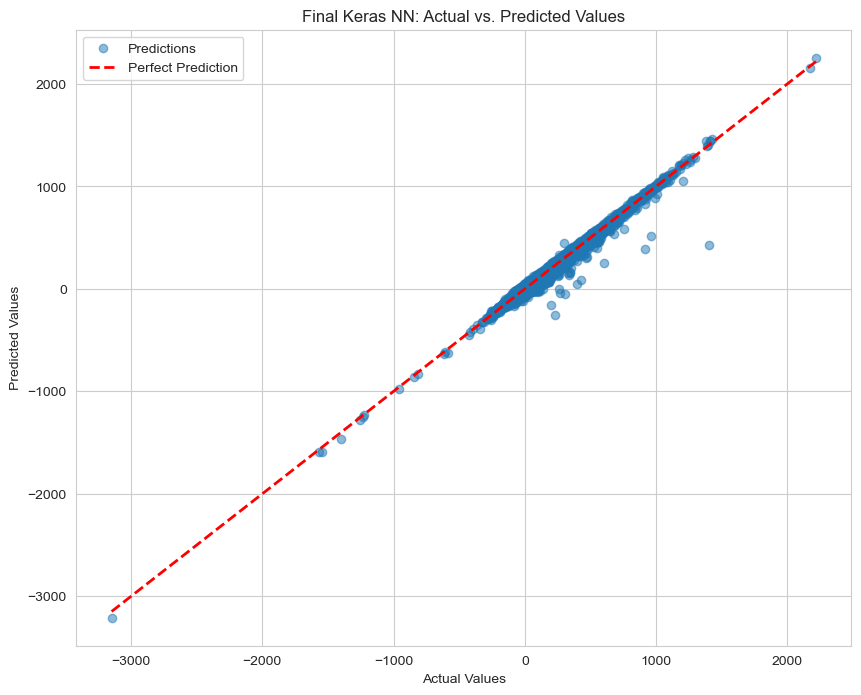

In [130]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# We are no longer using Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Keras and SciKeras imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# --- NEW: Manual Data Scaling ---
# We perform scaling manually before everything else.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled manually.")


# --- 2. Define a Function to Create the Keras Model ---
# The function now takes 'input_dim' as a standard argument again.
def construct_network_model(input_dim, layer_sizes, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    
    for size in layer_sizes:
        model.add(Dense(size, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    return model

# --- 3. Set up the KerasRegressor and Hyperparameter Grid ---

# Create the KerasRegressor wrapper.
# We explicitly pass the input dimension using the 'model__' prefix.
# This makes the model aware of the input shape from the start.
model = KerasRegressor(
    model=construct_network_model,
    verbose=0,
    model__input_dim=X_train_scaled.shape[1]  # Manually pass the input dimension
)

# Define the parameter grid
param_grid = {
    "model__layer_sizes": [[64, 32], [128, 64], [256, 128]],
    "model__dropout_rate": [0.2, 0.3],
    "model__learning_rate": [0.001, 0.01],
    "batch_size": [32, 64],  # NOTE: No 'model__' prefix needed here now
    "epochs": [150]
}

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)

# Instantiate GridSearchCV with the model, not a pipeline
grid = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

# --- 4. Run the Hyperparameter Search ---
print("\n--- Starting hyperparameter search... ---")
start_time = time.time()

# Fit the grid search on the SCALED training data
# We pass callbacks and validation_split directly to fit
grid.fit(
    X_train_scaled, 
    y_train, 
    callbacks=[early_stop], 
    validation_split=0.2
)

end_time = time.time()
print(f"\nSearch took {end_time - start_time:.2f} seconds.")

# --- 5. Evaluate and Save the Best Model ---
print("\n--- Evaluating the best model found by GridSearch ---")

print("Best parameters found: ", grid.best_params_)
best_cv_score = -grid.best_score_
print(f"Best cross-validation score (MAE): {best_cv_score:.2f} seconds")

best_model = grid.best_estimator_

# Save the weights of the best Keras model
best_model.model_.save("best_model_weights_final.keras")
print("\nBest model's weights saved to 'best_model_weights_final.keras'")

# Make predictions on the SCALED unseen test data
y_pred_best = best_model.predict(X_test_scaled)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# --- 6. Visualize the Results ---
print("\n--- Visualizing Keras Neural Network Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final Keras NN: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

--- Starting Randomized Search for RandomForestRegressor ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  25.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  25.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  19.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  19.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  53.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  53.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  57.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  57.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5

/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.5min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  27.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  28.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  50.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  50.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.1min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  54.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  53.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; to

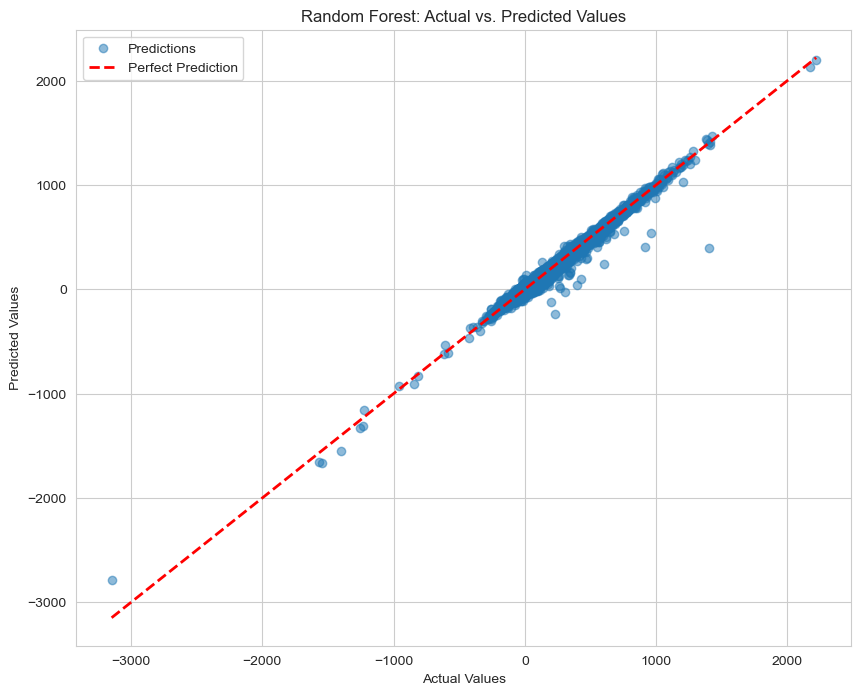

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # Import joblib for saving the model

# Assume X_train, X_test, y_train, y_test are already defined
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# --- 1. Define Parameter Space and Run Randomized Search ---

params = {
     'n_estimators': [100, 200, 300, 400],
     'max_depth': [10, 20, 30, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_distributions=params, 
    n_iter=20,
    cv=2,
    verbose=2, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

print("--- Starting Randomized Search for RandomForestRegressor ---")
random_search.fit(X_train, y_train)

# --- 2. Print Search Results ---

print("\n--- Search Complete ---")
best_params = random_search.best_params_
print("Best Parameters found:", best_params)

best_score = -random_search.best_score_
print(f"Best MAE score from search: {best_score:.2f}")


# --- 3. Evaluate and Save the Best Model (NEW SECTION) ---
print("\n--- Evaluating the best model found by RandomizedSearch ---")

# Get the best estimator (the trained model with the best parameters)
best_rf_model = random_search.best_estimator_

# Save the best model to a file using joblib
joblib.dump(best_rf_model, "best_random_forest_model.joblib")
print("\nBest Random Forest model saved to 'best_random_forest_model.joblib'")

# Make predictions on the unseen test data
# NOTE: We use X_test directly, NOT a scaled version, for tree-based models.
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate final performance metrics
mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")


# --- 4. Visualize the Results (NEW SECTION) ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

Does weather means more in higher-delay stops

In [188]:
# --- 再次确认筛选数据的步骤 ---
# 假设 df_subset 是你预处理好的总数据框
# 筛选出 stop_sequence 为 17, 18, 19, 20 的数据
final_stops_df = df_subset[df_subset['stop_sequence'].isin([17, 18, 19, 20])].copy()
print(f"已筛选出 {len(final_stops_df)} 条终点站的数据用于建模。")


# 特征 x4 是筛选后数据框中除了目标和非特征列之外的所有列
x4 = final_stops_df.drop([
    # --- 原有的列 ---
    'arrival_delay', 
    'Calendar_date', 
    'weather', 
    'temperature', 
    'day_of_week', 
    'time_of_day',    
    'traffic_condition',
    'upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time', 'travel_time_for_previous_section'
], axis=1, errors='ignore')

# （定义 y4 的代码保持不变）
y4 = final_stops_df['arrival_delay']

# 验证一下
print(f"Shape of x4: {x4.shape}")
print(f"Shape of y4: {y4.shape}")


# --- 现在，train_test_split 将会正常工作 ---
print("\n开始分割数据...")
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
print("数据分割成功！")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

已筛选出 16279 条终点站的数据用于建模。
Shape of x4: (16279, 20)
Shape of y4: (16279,)

开始分割数据...
数据分割成功！
X_train shape: (13023, 20)
X_test shape: (3256, 20)



模型在预测 stop_sequence 17-20 的延误时表现如下:
平均绝对误差 (Mean Absolute Error): 111.48 秒
R-squared: 0.4859


/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24310 (\N{CJK UNIFIED IDEOGRAPH-5EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabto

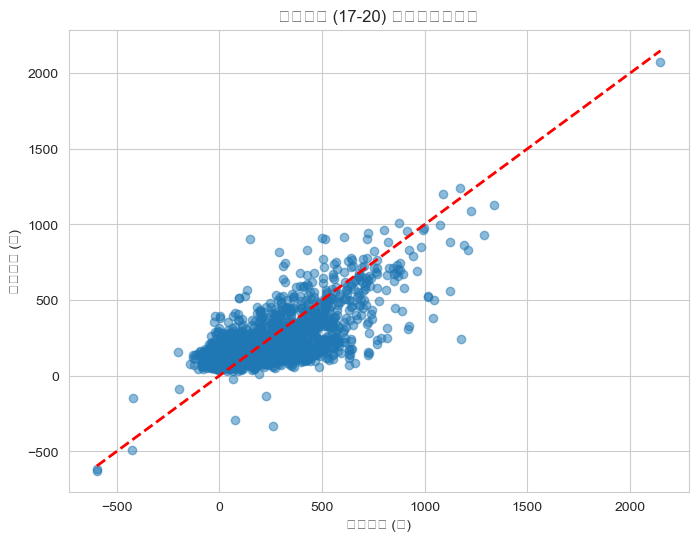

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 分割筛选后的数据
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n模型在预测 stop_sequence 17-20 的延误时表现如下:")
print(f"平均绝对误差 (Mean Absolute Error): {mae:.2f} 秒")
print(f"R-squared: {r2:.4f}")

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("真实延误 (秒)")
plt.ylabel("预测延误 (秒)")
plt.title("对终点站 (17-20) 延误的预测结果")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.show()

--- Using Fixed Parameters for RandomForestRegressor ---
{'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}

--- Starting Model Training ---
--- Training Complete ---

--- Evaluating the model on the test set ---

--- Final Performance on the Test Set ---
Final Model MAE: 109.61 seconds
Final Model RMSE: 141.46 seconds
Final Model R-squared: 0.5004

Final Random Forest model saved to 'final_random_forest_model.joblib'

--- Visualizing Random Forest Results ---


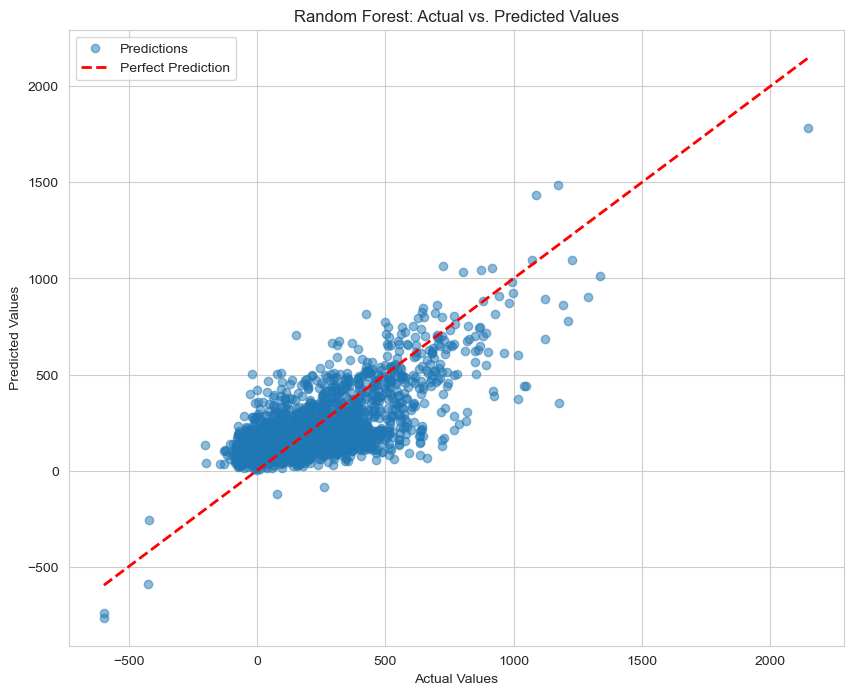

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Assuming you used this for splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 假设 x3 和 y3 已经定义好了
# Assume X_train, X_test, y_train, y_test are already defined
# If not, uncomment the line below:
# x3, y3 = ... your data here ...
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

# --- 1. 直接使用您指定的参数定义并训练模型 ---

# 您确定的最佳参数
final_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42,  # 保证结果可复现
    'n_jobs': -1         # 使用所有可用的CPU核心
}

print("--- Using Fixed Parameters for RandomForestRegressor ---")
print(final_params)

# 使用指定的参数创建随机森林回归模型
final_rf_model = RandomForestRegressor(**final_params)

# 在训练集上训练模型
print("\n--- Starting Model Training ---")
final_rf_model.fit(X_train, y_train)
print("--- Training Complete ---")


# --- 2. 评估并保存模型 ---
print("\n--- Evaluating the model on the test set ---")

# 使用训练好的模型对测试集进行预测
y_pred = final_rf_model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# 将最终模型保存到文件
joblib.dump(final_rf_model, "final_random_forest_model.joblib")
print("\nFinal Random Forest model saved to 'final_random_forest_model.joblib'")


# --- 3. 结果可视化 ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [193]:
# --- 再次确认筛选数据的步骤 ---
# 假设 df_subset 是你预处理好的总数据框
# 筛选出 stop_sequence 为 17, 18, 19, 20 的数据
final_stops_df = df_subset[df_subset['stop_sequence'].isin([17, 18, 19, 20])].copy()
print(f"已筛选出 {len(final_stops_df)} 条终点站的数据用于建模。")


# 特征 x4 是筛选后数据框中除了目标和非特征列之外的所有列
x5 = final_stops_df.drop([
    # --- 原有的列 ---
    'arrival_delay', 
    'Calendar_date', 
    'weather', 
    'temperature', 
    'day_of_week', 
    'time_of_day',    
    'upstream_stop_delay', 'previous_bus_delay', 'previous_trip_travel_time', 'travel_time_for_previous_section'
], axis=1, errors='ignore')

# （定义 y4 的代码保持不变）
y5 = final_stops_df['arrival_delay']

# 验证一下
print(f"Shape of x5: {x5.shape}")
print(f"Shape of y5: {y5.shape}")


# --- 现在，train_test_split 将会正常工作 ---
print("\n开始分割数据...")
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
print("数据分割成功！")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

已筛选出 16279 条终点站的数据用于建模。
Shape of x5: (16279, 21)
Shape of y5: (16279,)

开始分割数据...
数据分割成功！
X_train shape: (13023, 21)
X_test shape: (3256, 21)



模型在预测 stop_sequence 17-20 的延误时表现如下:
平均绝对误差 (Mean Absolute Error): 111.26 秒
R-squared: 0.4882


/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24310 (\N{CJK UNIFIED IDEOGRAPH-5EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabto

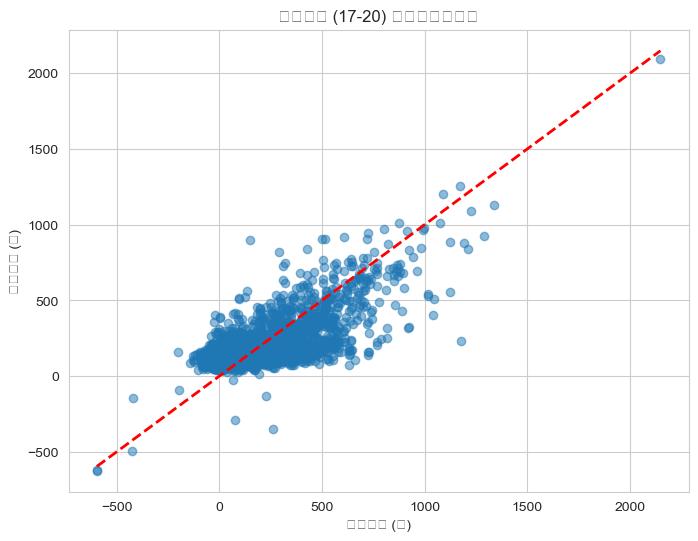

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 分割筛选后的数据
X_train, X_test, y_train, y_test = train_test_split(x5, y5, test_size=0.2, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n模型在预测 stop_sequence 17-20 的延误时表现如下:")
print(f"平均绝对误差 (Mean Absolute Error): {mae:.2f} 秒")
print(f"R-squared: {r2:.4f}")

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("真实延误 (秒)")
plt.ylabel("预测延误 (秒)")
plt.title("对终点站 (17-20) 延误的预测结果")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.show()

--- Using Fixed Parameters for RandomForestRegressor ---
{'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}

--- Starting Model Training ---
--- Training Complete ---

--- Evaluating the model on the test set ---

--- Final Performance on the Test Set ---
Final Model MAE: 109.61 seconds
Final Model RMSE: 141.46 seconds
Final Model R-squared: 0.5004

Final Random Forest model saved to 'final_random_forest_model.joblib'

--- Visualizing Random Forest Results ---


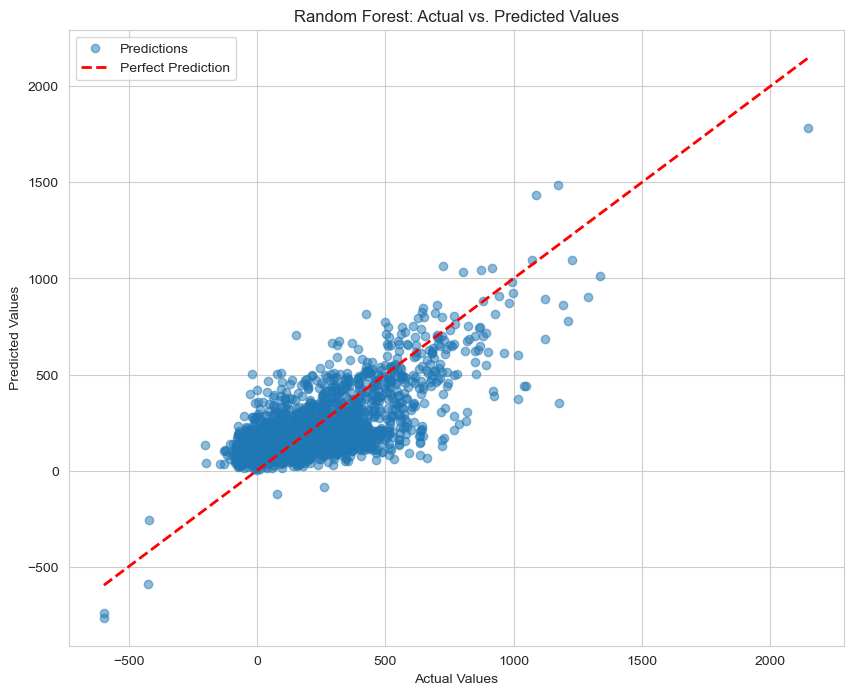

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Assuming you used this for splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 假设 x3 和 y3 已经定义好了
# Assume X_train, X_test, y_train, y_test are already defined
# If not, uncomment the line below:
# x3, y3 = ... your data here ...
X_train, X_test, y_train, y_test = train_test_split(x5, y5, test_size=0.2, random_state=42)

# --- 1. 直接使用您指定的参数定义并训练模型 ---

# 您确定的最佳参数
final_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42,  # 保证结果可复现
    'n_jobs': -1         # 使用所有可用的CPU核心
}

print("--- Using Fixed Parameters for RandomForestRegressor ---")
print(final_params)

# 使用指定的参数创建随机森林回归模型
final_rf_model = RandomForestRegressor(**final_params)

# 在训练集上训练模型
print("\n--- Starting Model Training ---")
final_rf_model.fit(X_train, y_train)
print("--- Training Complete ---")


# --- 2. 评估并保存模型 ---
print("\n--- Evaluating the model on the test set ---")

# 使用训练好的模型对测试集进行预测
y_pred = final_rf_model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# 将最终模型保存到文件
joblib.dump(final_rf_model, "final_random_forest_model.joblib")
print("\nFinal Random Forest model saved to 'final_random_forest_model.joblib'")


# --- 3. 结果可视化 ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

Advanced ITS stop 17-20

In [222]:
# --- 再次确认筛选数据的步骤 ---
# 假设 df_subset 是你预处理好的总数据框
# 筛选出 stop_sequence 为 17, 18, 19, 20 的数据
final_stops_df = df_subset[df_subset['stop_sequence'].isin([17, 18, 19, 20])].copy()
print(f"已筛选出 {len(final_stops_df)} 条终点站的数据用于建模。")


# 特征 x4 是筛选后数据框中除了目标和非特征列之外的所有列
x8 = final_stops_df.drop([
    # --- 原有的列 ---
    'arrival_delay', 
    'Calendar_date', 
    'weather', 
    'temperature', 
    'day_of_week', 
    'time_of_day',    
], axis=1, errors='ignore')

# （定义 y4 的代码保持不变）
y8 = final_stops_df['arrival_delay']

# 验证一下
print(f"Shape of x5: {x5.shape}")
print(f"Shape of y5: {y5.shape}")


# --- 现在，train_test_split 将会正常工作 ---
print("\n开始分割数据...")
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
print("数据分割成功！")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

已筛选出 16279 条终点站的数据用于建模。
Shape of x5: (16279, 21)
Shape of y5: (16279,)

开始分割数据...
数据分割成功！
X_train shape: (13023, 21)
X_test shape: (3256, 21)


--- Using Fixed Parameters for RandomForestRegressor ---
{'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}

--- Starting Model Training ---
--- Training Complete ---

--- Evaluating the model on the test set ---

--- Final Performance on the Test Set ---
Final Model MAE: 15.84 seconds
Final Model RMSE: 24.82 seconds
Final Model R-squared: 0.9846

Final Random Forest model saved to 'final_random_forest_model.joblib'

--- Visualizing Random Forest Results ---


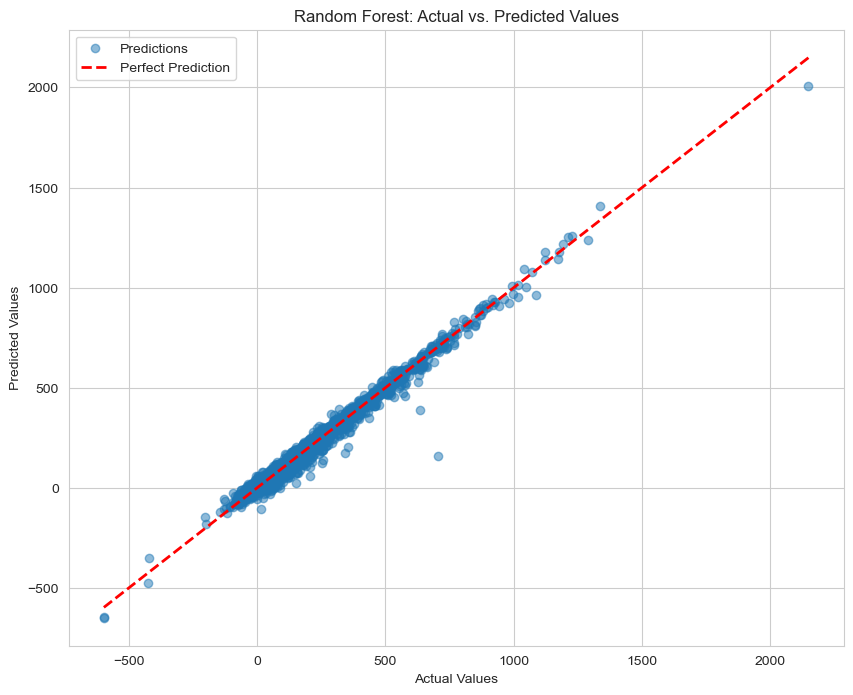

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Assuming you used this for splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 假设 x3 和 y3 已经定义好了
# Assume X_train, X_test, y_train, y_test are already defined
# If not, uncomment the line below:
# x3, y3 = ... your data here ...
X_train, X_test, y_train, y_test = train_test_split(x8, y8, test_size=0.2, random_state=42)

# --- 1. 直接使用您指定的参数定义并训练模型 ---

# 您确定的最佳参数
final_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42,  # 保证结果可复现
    'n_jobs': -1         # 使用所有可用的CPU核心
}

print("--- Using Fixed Parameters for RandomForestRegressor ---")
print(final_params)

# 使用指定的参数创建随机森林回归模型
final_rf_model = RandomForestRegressor(**final_params)

# 在训练集上训练模型
print("\n--- Starting Model Training ---")
final_rf_model.fit(X_train, y_train)
print("--- Training Complete ---")


# --- 2. 评估并保存模型 ---
print("\n--- Evaluating the model on the test set ---")

# 使用训练好的模型对测试集进行预测
y_pred = final_rf_model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# 将最终模型保存到文件
joblib.dump(final_rf_model, "final_random_forest_model.joblib")
print("\nFinal Random Forest model saved to 'final_random_forest_model.joblib'")


# --- 3. 结果可视化 ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
# --- 再次确认筛选数据的步骤 ---
# 假设 df_subset 是你预处理好的总数据框
# 筛选出 stop_sequence 为 17, 18, 19, 20 的数据
final_stops_df = df_subset[df_subset['stop_sequence'].isin([17, 18, 19, 20])].copy()
print(f"已筛选出 {len(final_stops_df)} 条终点站的数据用于建模。")


# 特征 x4 是筛选后数据框中除了目标和非特征列之外的所有列
x9 = final_stops_df.drop([
    # --- 原有的列 ---
    'arrival_delay', 
    'Calendar_date', 
    'weather', 
    'temperature', 
    'day_of_week', 
    'time_of_day', 'traffic_condition' 
], axis=1, errors='ignore')

# （定义 y4 的代码保持不变）
y9 = final_stops_df['arrival_delay']

# 验证一下
print(f"Shape of x5: {x5.shape}")
print(f"Shape of y5: {y5.shape}")


# --- 现在，train_test_split 将会正常工作 ---
print("\n开始分割数据...")
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
print("数据分割成功！")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

已筛选出 16279 条终点站的数据用于建模。
Shape of x5: (16279, 21)
Shape of y5: (16279,)

开始分割数据...
数据分割成功！
X_train shape: (13023, 21)
X_test shape: (3256, 21)


--- Using Fixed Parameters for RandomForestRegressor ---
{'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}

--- Starting Model Training ---
--- Training Complete ---

--- Evaluating the model on the test set ---

--- Final Performance on the Test Set ---
Final Model MAE: 15.94 seconds
Final Model RMSE: 24.88 seconds
Final Model R-squared: 0.9845

Final Random Forest model saved to 'final_random_forest_model.joblib'

--- Visualizing Random Forest Results ---


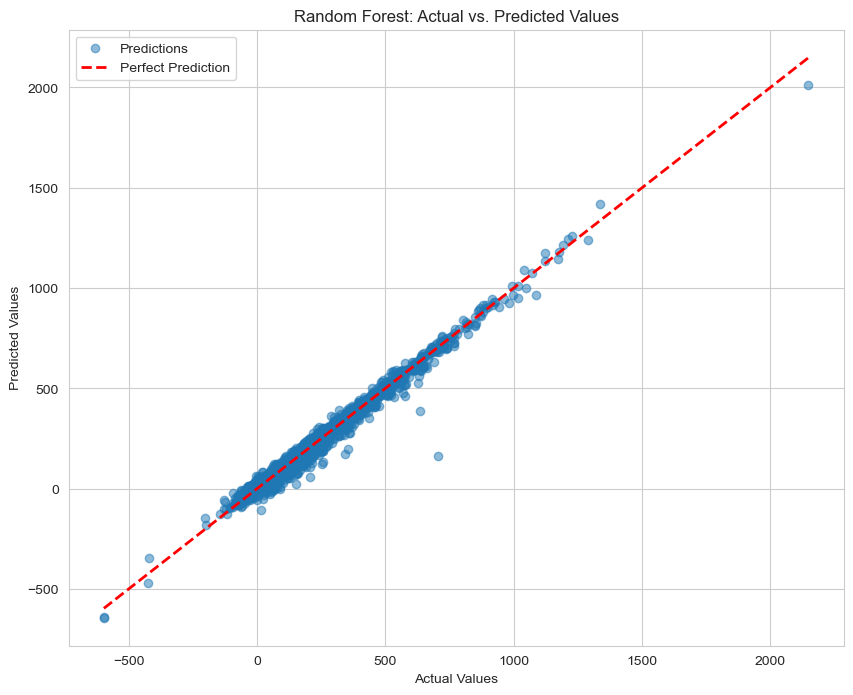

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Assuming you used this for splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 假设 x3 和 y3 已经定义好了
# Assume X_train, X_test, y_train, y_test are already defined
# If not, uncomment the line below:
# x3, y3 = ... your data here ...
X_train, X_test, y_train, y_test = train_test_split(x9, y9, test_size=0.2, random_state=42)

# --- 1. 直接使用您指定的参数定义并训练模型 ---

# 您确定的最佳参数
final_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42,  # 保证结果可复现
    'n_jobs': -1         # 使用所有可用的CPU核心
}

print("--- Using Fixed Parameters for RandomForestRegressor ---")
print(final_params)

# 使用指定的参数创建随机森林回归模型
final_rf_model = RandomForestRegressor(**final_params)

# 在训练集上训练模型
print("\n--- Starting Model Training ---")
final_rf_model.fit(X_train, y_train)
print("--- Training Complete ---")


# --- 2. 评估并保存模型 ---
print("\n--- Evaluating the model on the test set ---")

# 使用训练好的模型对测试集进行预测
y_pred = final_rf_model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# 将最终模型保存到文件
joblib.dump(final_rf_model, "final_random_forest_model.joblib")
print("\nFinal Random Forest model saved to 'final_random_forest_model.joblib'")


# --- 3. 结果可视化 ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
# --- 再次确认筛选数据的步骤 ---
# 假设 df_subset 是你预处理好的总数据框
# 筛选出 stop_sequence 为 17, 18, 19, 20 的数据
final_stops_df = df_subset[df_subset['stop_sequence'].isin([1, 4, 12, 27])].copy()
print(f"已筛选出 {len(final_stops_df)} 条终点站的数据用于建模。")


# 特征 x4 是筛选后数据框中除了目标和非特征列之外的所有列
x6 = final_stops_df.drop([
    # --- 原有的列 ---
    'arrival_delay', 
    'Calendar_date', 
    'weather', 
    'temperature', 
    'day_of_week', 
    'time_of_day',    
], axis=1, errors='ignore')

# （定义 y4 的代码保持不变）
y6 = final_stops_df['arrival_delay']

# 验证一下
print(f"Shape of x5: {x6.shape}")
print(f"Shape of y5: {y6.shape}")


# --- 现在，train_test_split 将会正常工作 ---
print("\n开始分割数据...")
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
print("数据分割成功！")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

已筛选出 16007 条终点站的数据用于建模。
Shape of x5: (16007, 25)
Shape of y5: (16007,)

开始分割数据...
数据分割成功！
X_train shape: (13023, 21)
X_test shape: (3256, 21)



模型在预测 stop_sequence 17-20 的延误时表现如下:
平均绝对误差 (Mean Absolute Error): 17.17 秒
R-squared: 0.9738


/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24310 (\N{CJK UNIFIED IDEOGRAPH-5EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabto

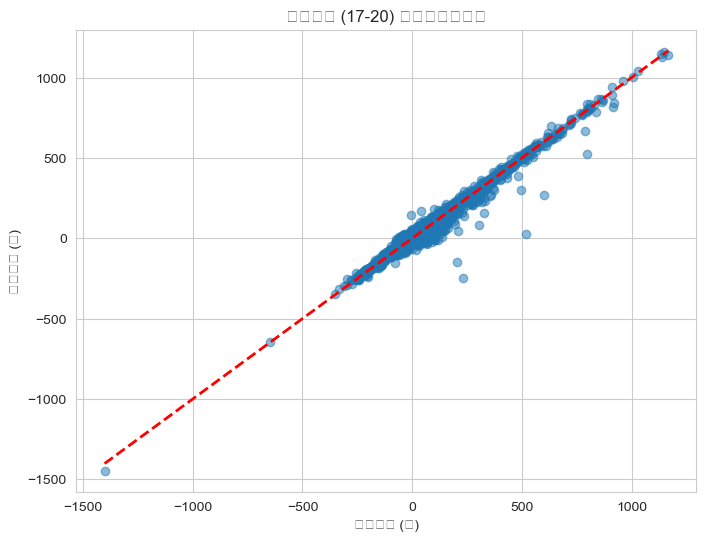

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 分割筛选后的数据
X_train, X_test, y_train, y_test = train_test_split(x6, y6, test_size=0.2, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n模型在预测 stop_sequence 17-20 的延误时表现如下:")
print(f"平均绝对误差 (Mean Absolute Error): {mae:.2f} 秒")
print(f"R-squared: {r2:.4f}")

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("真实延误 (秒)")
plt.ylabel("预测延误 (秒)")
plt.title("对终点站 (17-20) 延误的预测结果")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.show()


模型在预测 stop_sequence 17-20 的延误时表现如下:
平均绝对误差 (Mean Absolute Error): 17.17 秒
R-squared: 0.9738


/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24310 (\N{CJK UNIFIED IDEOGRAPH-5EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabto

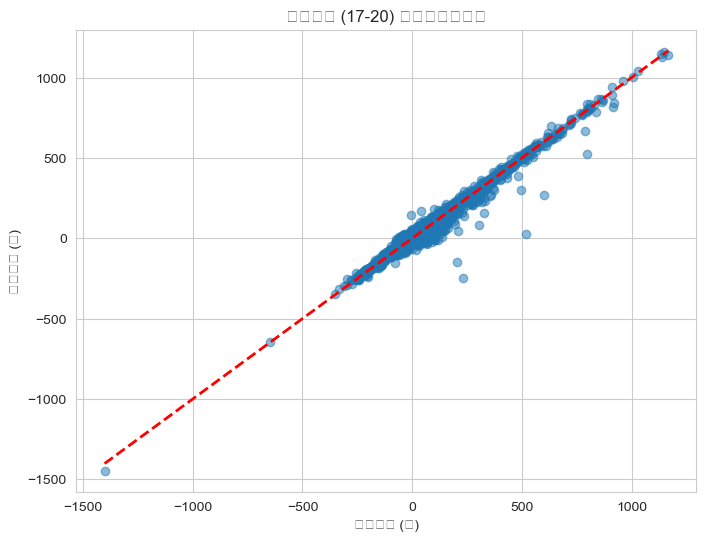

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 分割筛选后的数据
X_train, X_test, y_train, y_test = train_test_split(x6, y6, test_size=0.2, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n模型在预测 stop_sequence 17-20 的延误时表现如下:")
print(f"平均绝对误差 (Mean Absolute Error): {mae:.2f} 秒")
print(f"R-squared: {r2:.4f}")

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("真实延误 (秒)")
plt.ylabel("预测延误 (秒)")
plt.title("对终点站 (17-20) 延误的预测结果")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.show()

--- Using Fixed Parameters for RandomForestRegressor ---
{'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}

--- Starting Model Training ---
--- Training Complete ---

--- Evaluating the model on the test set ---

--- Final Performance on the Test Set ---
Final Model MAE: 19.70 seconds
Final Model RMSE: 33.24 seconds
Final Model R-squared: 0.9654

Final Random Forest model saved to 'final_random_forest_model.joblib'

--- Visualizing Random Forest Results ---


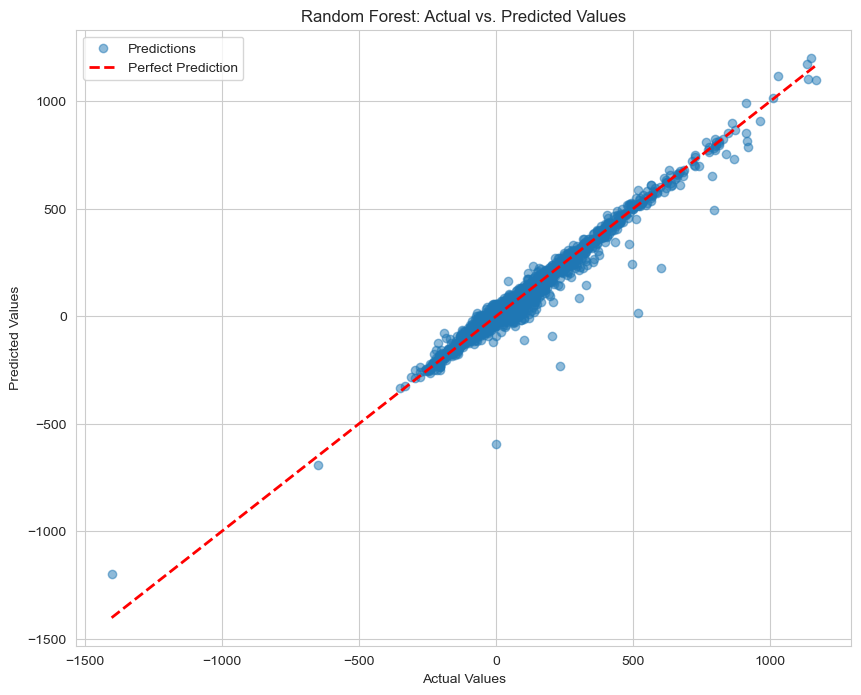

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Assuming you used this for splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 假设 x3 和 y3 已经定义好了
# Assume X_train, X_test, y_train, y_test are already defined
# If not, uncomment the line below:
# x3, y3 = ... your data here ...
X_train, X_test, y_train, y_test = train_test_split(x6, y6, test_size=0.2, random_state=42)

# --- 1. 直接使用您指定的参数定义并训练模型 ---

# 您确定的最佳参数
final_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42,  # 保证结果可复现
    'n_jobs': -1         # 使用所有可用的CPU核心
}

print("--- Using Fixed Parameters for RandomForestRegressor ---")
print(final_params)

# 使用指定的参数创建随机森林回归模型
final_rf_model = RandomForestRegressor(**final_params)

# 在训练集上训练模型
print("\n--- Starting Model Training ---")
final_rf_model.fit(X_train, y_train)
print("--- Training Complete ---")


# --- 2. 评估并保存模型 ---
print("\n--- Evaluating the model on the test set ---")

# 使用训练好的模型对测试集进行预测
y_pred = final_rf_model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# 将最终模型保存到文件
joblib.dump(final_rf_model, "final_random_forest_model.joblib")
print("\nFinal Random Forest model saved to 'final_random_forest_model.joblib'")


# --- 3. 结果可视化 ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [235]:
# --- 再次确认筛选数据的步骤 ---
# 假设 df_subset 是你预处理好的总数据框
# 筛选出 stop_sequence 为 17, 18, 19, 20 的数据
final_stops_df = df_subset[df_subset['stop_sequence'].isin([1, 4, 12, 27])].copy()
print(f"已筛选出 {len(final_stops_df)} 条终点站的数据用于建模。")


# 特征 x4 是筛选后数据框中除了目标和非特征列之外的所有列
x7 = final_stops_df.drop([
    # --- 原有的列 ---
    'arrival_delay', 
    'Calendar_date', 
    'weather', 
    'temperature', 
    'day_of_week', 
    'time_of_day',
    'traffic_condition'
], axis=1, errors='ignore')

# （定义 y4 的代码保持不变）
y7 = final_stops_df['arrival_delay']

# 验证一下
print(f"Shape of x5: {x7.shape}")
print(f"Shape of y5: {y7.shape}")


# --- 现在，train_test_split 将会正常工作 ---
print("\n开始分割数据...")
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
print("数据分割成功！")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

已筛选出 16007 条终点站的数据用于建模。
Shape of x5: (16007, 24)
Shape of y5: (16007,)

开始分割数据...
数据分割成功！
X_train shape: (13023, 21)
X_test shape: (3256, 21)



模型在预测 stop_sequence 17-20 的延误时表现如下:
平均绝对误差 (Mean Absolute Error): 17.29 秒
R-squared: 0.9727


/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24310 (\N{CJK UNIFIED IDEOGRAPH-5EF6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/IPython/core/pylabto

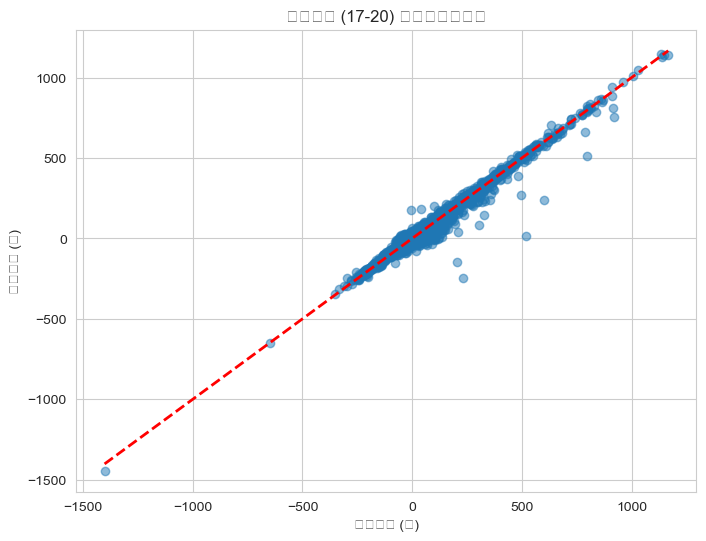

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 分割筛选后的数据
X_train, X_test, y_train, y_test = train_test_split(x7, y7, test_size=0.2, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n模型在预测 stop_sequence 17-20 的延误时表现如下:")
print(f"平均绝对误差 (Mean Absolute Error): {mae:.2f} 秒")
print(f"R-squared: {r2:.4f}")

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("真实延误 (秒)")
plt.ylabel("预测延误 (秒)")
plt.title("对终点站 (17-20) 延误的预测结果")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.show()

--- Using Fixed Parameters for RandomForestRegressor ---
{'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}

--- Starting Model Training ---
--- Training Complete ---

--- Evaluating the model on the test set ---

--- Final Performance on the Test Set ---
Final Model MAE: 19.79 seconds
Final Model RMSE: 33.66 seconds
Final Model R-squared: 0.9645

Final Random Forest model saved to 'final_random_forest_model.joblib'

--- Visualizing Random Forest Results ---


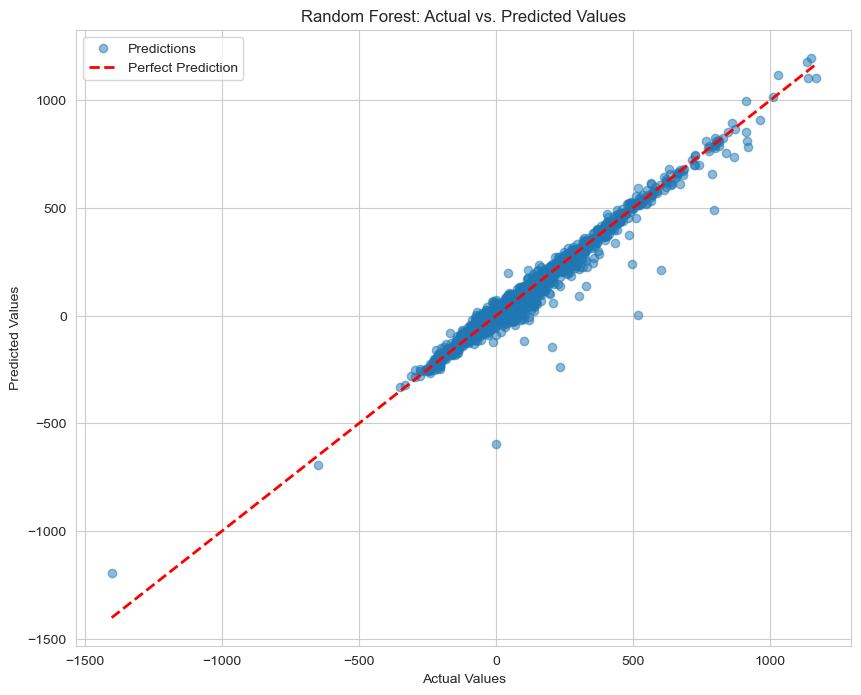

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Assuming you used this for splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 假设 x3 和 y3 已经定义好了
# Assume X_train, X_test, y_train, y_test are already defined
# If not, uncomment the line below:
# x3, y3 = ... your data here ...
X_train, X_test, y_train, y_test = train_test_split(x7, y7, test_size=0.2, random_state=42)

# --- 1. 直接使用您指定的参数定义并训练模型 ---

# 您确定的最佳参数
final_params = {
    'n_estimators': 400,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42,  # 保证结果可复现
    'n_jobs': -1         # 使用所有可用的CPU核心
}

print("--- Using Fixed Parameters for RandomForestRegressor ---")
print(final_params)

# 使用指定的参数创建随机森林回归模型
final_rf_model = RandomForestRegressor(**final_params)

# 在训练集上训练模型
print("\n--- Starting Model Training ---")
final_rf_model.fit(X_train, y_train)
print("--- Training Complete ---")


# --- 2. 评估并保存模型 ---
print("\n--- Evaluating the model on the test set ---")

# 使用训练好的模型对测试集进行预测
y_pred = final_rf_model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Final Performance on the Test Set ---")
print(f"Final Model MAE: {mae:.2f} seconds")
print(f"Final Model RMSE: {rmse:.2f} seconds")
print(f"Final Model R-squared: {r2:.4f}")

# 将最终模型保存到文件
joblib.dump(final_rf_model, "final_random_forest_model.joblib")
print("\nFinal Random Forest model saved to 'final_random_forest_model.joblib'")


# --- 3. 结果可视化 ---
print("\n--- Visualizing Random Forest Results ---")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()